# AIM 460 - Robotics and Computer Vision with AI Image Processing

## Learning Objectives
By the end of this notebook, you will be able to:
- Understand fundamental computer vision concepts and their applications in robotics
- Apply traditional image processing techniques using OpenCV
- Implement machine learning approaches for image classification and object detection
- Compare and evaluate different learning approaches for computer vision tasks
- Build practical computer vision systems for robotics applications
- Understand the integration of AI with robotics perception systems

---

## Introduction to Computer Vision in Robotics

Computer vision is a fundamental component of modern robotics systems, enabling robots to perceive, understand, and interact with their environment. It bridges the gap between raw sensor data (images) and meaningful information that robots can use for navigation, manipulation, and decision-making.

### Key Applications in Robotics:
1. **Autonomous Navigation**: Path planning, obstacle avoidance, SLAM (Simultaneous Localization and Mapping)
2. **Object Recognition and Manipulation**: Identifying and grasping objects
3. **Quality Control**: Industrial inspection and defect detection
4. **Human-Robot Interaction**: Facial recognition, gesture recognition
5. **Medical Robotics**: Surgical assistance, diagnostic imaging
6. **Agricultural Robotics**: Crop monitoring, precision farming

### Computer Vision Pipeline in Robotics:
```
Image Acquisition → Preprocessing → Feature Extraction → Analysis → Decision Making → Action
```

---

## Part 1: Fundamentals of Image Processing

### 1.1 Image Representation and Basic Operations

Images are represented as multi-dimensional arrays:
- **Grayscale Images**: 2D arrays with intensity values (0-255)
- **Color Images**: 3D arrays with RGB channels
- **Image Coordinates**: (row, column) or (y, x) convention

### 1.2 Essential Image Processing Operations

#### Spatial Domain Operations:
- **Point Operations**: Brightness adjustment, contrast enhancement, histogram equalization
- **Neighborhood Operations**: Smoothing, sharpening, edge detection
- **Geometric Operations**: Rotation, scaling, translation, perspective transformation

#### Frequency Domain Operations:
- **Fourier Transform**: Frequency analysis and filtering
- **Convolution**: Feature detection using kernels/filters

### 1.3 Feature Detection and Extraction

#### Low-level Features:
- **Edges**: Sobel, Canny, Laplacian operators
- **Corners**: Harris corner detector, FAST
- **Blobs**: Laplacian of Gaussian (LoG), Difference of Gaussians (DoG)

#### High-level Features:
- **SIFT**: Scale-Invariant Feature Transform
- **SURF**: Speeded-Up Robust Features
- **ORB**: Oriented FAST and Rotated BRIEF
- **HOG**: Histogram of Oriented Gradients

---

## Part 2: Machine Learning Approaches for Computer Vision

### 2.1 Traditional Machine Learning

#### Feature-based Approaches:
1. **Hand-crafted Features + Classical Classifiers**
   - Extract features (HOG, SIFT, LBP)
   - Train classifiers (SVM, Random Forest, k-NN)
   - Good for specific, well-defined problems

2. **Bag of Visual Words (BoVW)**
   - Create visual vocabulary from local features
   - Represent images as histograms of visual words
   - Apply text classification techniques to images

### 2.2 Deep Learning Approaches

#### Convolutional Neural Networks (CNNs):
1. **Image Classification**: AlexNet, VGG, ResNet, EfficientNet
2. **Object Detection**: R-CNN, YOLO, SSD
3. **Semantic Segmentation**: U-Net, FCN, DeepLab
4. **Instance Segmentation**: Mask R-CNN

#### Advanced Architectures:
- **Transfer Learning**: Using pre-trained models
- **Fine-tuning**: Adapting models to specific tasks
- **Data Augmentation**: Increasing dataset diversity

### 2.3 Hybrid Approaches

Combining traditional computer vision with machine learning:
- **Feature Engineering + ML**: Enhanced feature sets with classical algorithms
- **CNN Features + Classical ML**: Using CNN as feature extractor
- **Ensemble Methods**: Combining multiple approaches

---

## Part 3: Robotics-Specific Computer Vision Challenges

### 3.1 Real-time Processing Requirements
- **Computational Constraints**: Limited processing power on robotic platforms
- **Latency Requirements**: Real-time decision making
- **Memory Limitations**: Efficient algorithms and data structures

### 3.2 Environmental Challenges
- **Lighting Variations**: Indoor/outdoor, day/night conditions
- **Weather Conditions**: Rain, fog, snow effects
- **Dynamic Environments**: Moving objects, changing scenes

### 3.3 Sensor Integration
- **Multi-modal Sensing**: RGB cameras, depth sensors, LiDAR, IMU
- **Sensor Fusion**: Combining information from multiple sensors
- **Calibration**: Intrinsic and extrinsic camera calibration

---

# Practical Implementation

In [6]:
pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 2.6/46.2 MB 15.1 MB/s eta 0:00:03
   ---- ----------------------------------- 5.8/46.2 MB 14.7 MB/s eta 0:00:03
   ------- -------------------------------- 8.9/46.2 MB 15.0 MB/s eta 0:00:03
   ---------- ----------------------------- 11.8/46.2 MB 14.8 MB/s eta 0:00:03
   ------------ --------------------------- 14.9/46.2 MB 14.9 MB/s eta 0:00:03
   --------------- ------------------------ 18.1/46.2 MB 14.8 MB/s eta 0:00:02
   ------------------ --------------------- 21.2/46.2 MB 14.9 MB/s eta 0:00:02
   --------------------- ------------------ 24.4/46.2 MB 15.0 MB/s eta 0:00:02
   ----------------------- ---------------- 27.5/46.2 MB 14.9 MB/s eta 0:00:02
   -------------------------- ------------- 30.4/46.2 MB 14.7 MB/s eta 0:00:02
   ---------------------------- ----------- 33.3/46.2 MB 14.7 MB/s eta 0:00:01
   ------------------------------- -------- 36.2/46.2 MB 14.5 MB

In [1]:
# Import comprehensive libraries for computer vision and robotics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import cv2
from skimage import feature, measure, segmentation
from skimage.feature import local_binary_pattern, hog
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Deep Learning (simulation - we'll create synthetic examples)
from sklearn.neural_network import MLPClassifier

# For creating synthetic datasets and demonstrations
from sklearn.datasets import make_classification

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("OpenCV version:", cv2.__version__)

Libraries imported successfully!
OpenCV version: 4.11.0


## Example 1: Traditional Image Processing Pipeline

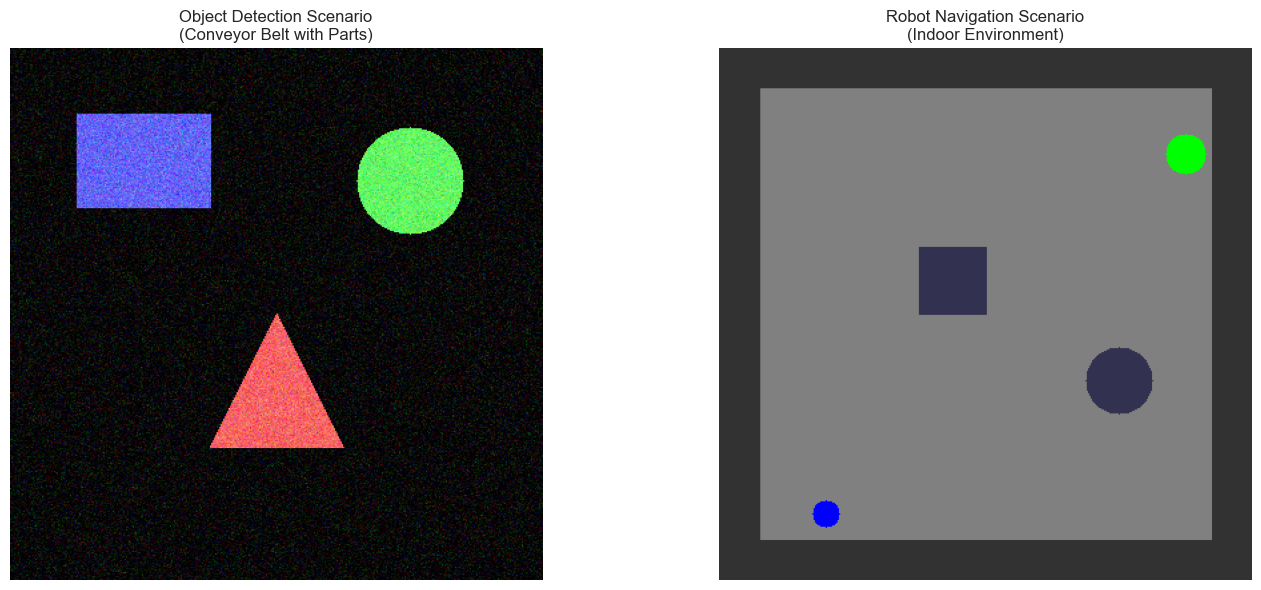

Synthetic robotic vision scenarios created!
Objects detected in scene 1: 3
  Object 1: rectangle at (50, 50, 100, 70)
  Object 2: circle at (260, 60, 80, 80)
  Object 3: triangle at (150, 200, 100, 100)


In [4]:
# Create synthetic images to simulate robotic vision scenarios
def create_synthetic_image(image_type='objects', size=(400, 400), noise_level=0.1):
    """Create synthetic images for computer vision demonstrations"""
    height, width = size
    image = np.zeros((height, width, 3), dtype=np.uint8)
    
    if image_type == 'objects':
        # Create synthetic objects (simulating parts on a conveyor belt)
        objects = []
        
        # Rectangle (simulating a box)
        cv2.rectangle(image, (50, 50), (150, 120), (255, 100, 100), -1)
        objects.append({'type': 'rectangle', 'bbox': (50, 50, 100, 70)})
        
        # Circle (simulating a wheel or bearing)
        cv2.circle(image, (300, 100), 40, (100, 255, 100), -1)
        objects.append({'type': 'circle', 'bbox': (260, 60, 80, 80)})
        
        # Triangle (simulating a gear)
        triangle_pts = np.array([[200, 200], [250, 300], [150, 300]], np.int32)
        cv2.fillPoly(image, [triangle_pts], (100, 100, 255))
        objects.append({'type': 'triangle', 'bbox': (150, 200, 100, 100)})
        
        # Add some noise to simulate real-world conditions
        noise = np.random.normal(0, noise_level * 255, image.shape).astype(np.int16)
        image = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)
        
        return image, objects
    
    elif image_type == 'navigation':
        # Create a simple navigation scene
        # Floor (gray)
        image[:, :] = (128, 128, 128)
        
        # Walls (darker)
        cv2.rectangle(image, (0, 0), (width, 30), (50, 50, 50), -1)  # Top wall
        cv2.rectangle(image, (0, height-30), (width, height), (50, 50, 50), -1)  # Bottom wall
        cv2.rectangle(image, (0, 0), (30, height), (50, 50, 50), -1)  # Left wall
        cv2.rectangle(image, (width-30, 0), (width, height), (50, 50, 50), -1)  # Right wall
        
        # Obstacles
        cv2.rectangle(image, (150, 150), (200, 200), (80, 50, 50), -1)  # Obstacle 1
        cv2.circle(image, (300, 250), 25, (80, 50, 50), -1)  # Obstacle 2
        
        # Goal (bright color)
        cv2.circle(image, (350, 80), 15, (0, 255, 0), -1)
        
        # Robot position (different color)
        cv2.circle(image, (80, 350), 10, (255, 0, 0), -1)
        
        return image, None
    
    return image, None

# Generate sample images
object_image, objects_info = create_synthetic_image('objects')
navigation_image, _ = create_synthetic_image('navigation')

# Display the synthetic images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Object Detection Scenario\n(Conveyor Belt with Parts)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(navigation_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Robot Navigation Scenario\n(Indoor Environment)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Synthetic robotic vision scenarios created!")
print(f"Objects detected in scene 1: {len(objects_info)}")
for i, obj in enumerate(objects_info):
    print(f"  Object {i+1}: {obj['type']} at {obj['bbox']}")

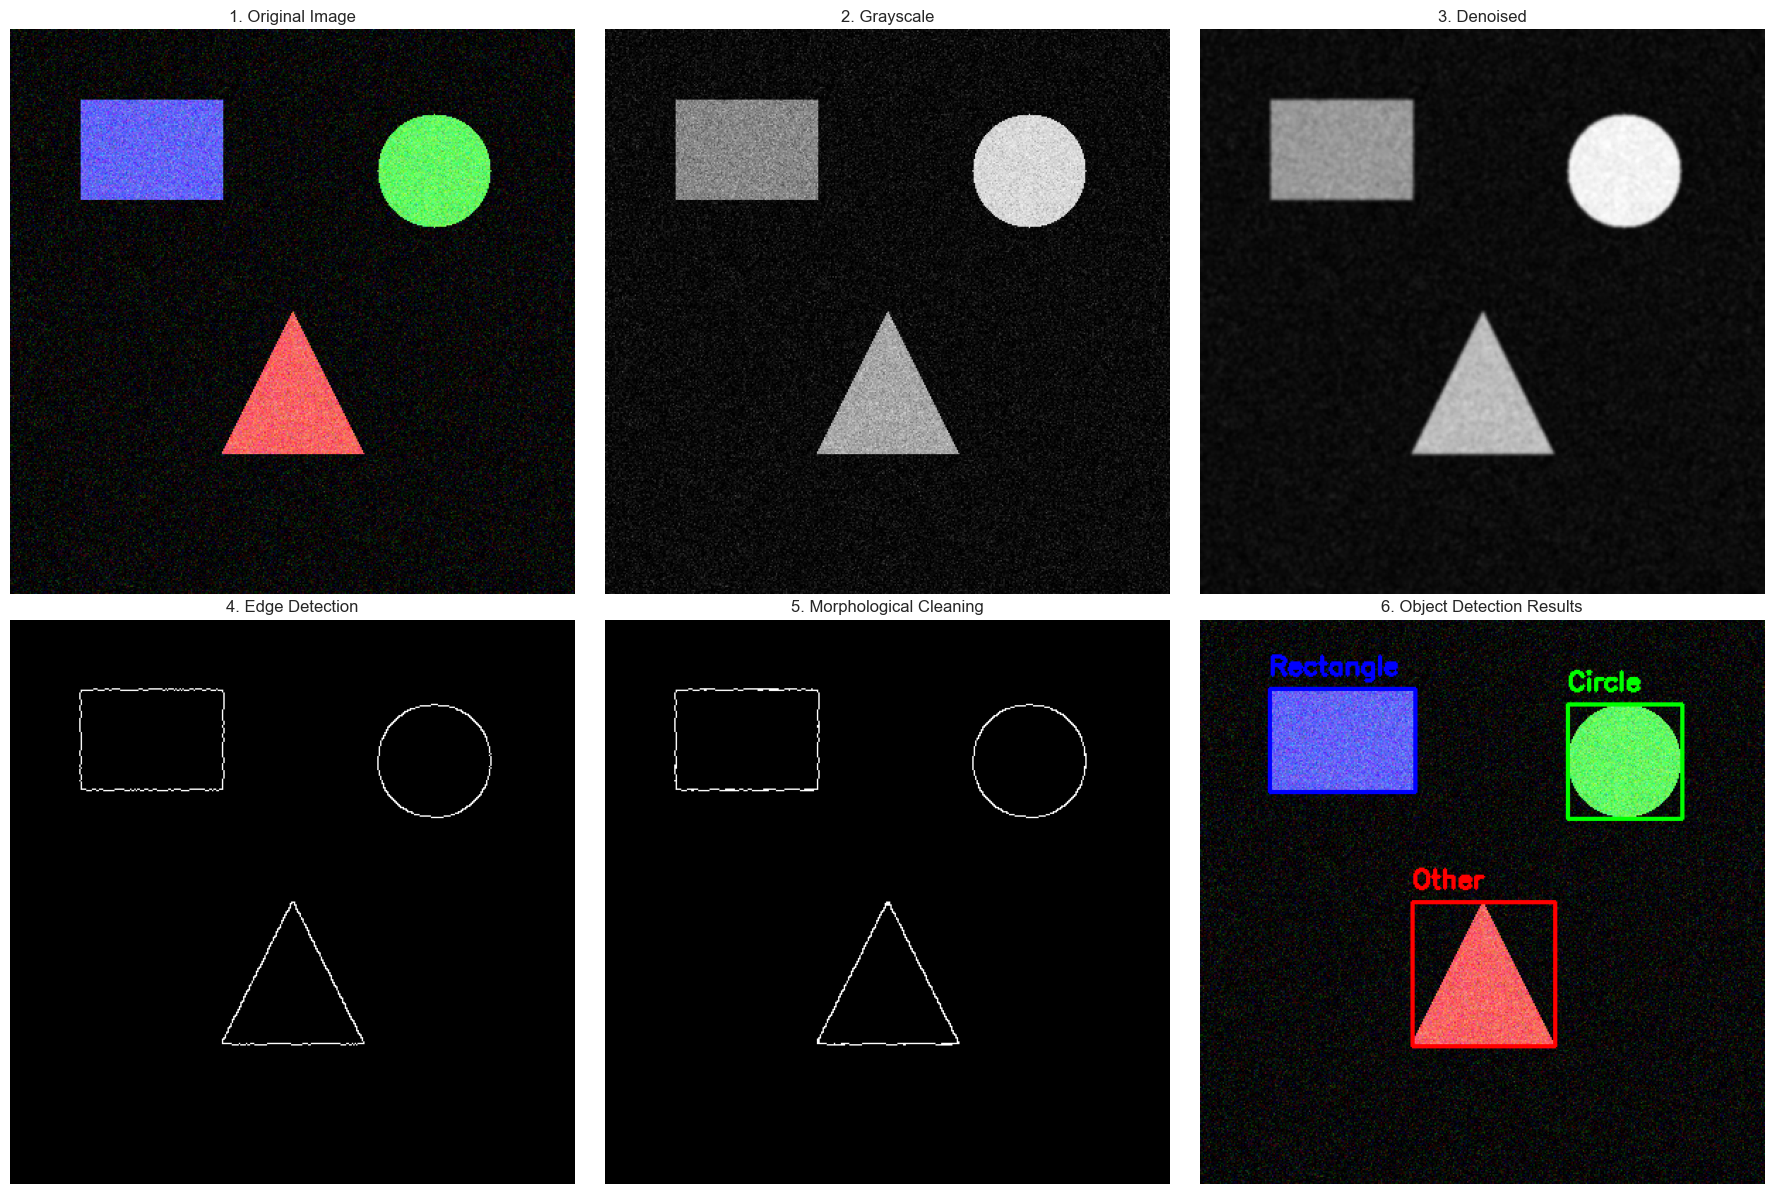


Traditional Image Processing Results:
Number of objects detected: 3
  Object 1: Other - Area: 5186, Circularity: 0.542
  Object 2: Circle - Area: 5062, Circularity: 0.898
  Object 3: Rectangle - Area: 7179, Circularity: 0.690


In [6]:
# TRADITIONAL IMAGE PROCESSING TECHNIQUES

def apply_image_processing_pipeline(image, show_steps=True):
    """Apply a complete image processing pipeline"""
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 1. Noise reduction
    denoised = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 2. Edge detection
    edges = cv2.Canny(denoised, 50, 150)
    
    # 3. Morphological operations
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    
    # 4. Contour detection
    contours, hierarchy = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 5. Object analysis
    result_image = image.copy()
    detected_objects = []
    
    for i, contour in enumerate(contours):
        # Filter by area
        area = cv2.contourArea(contour)
        if area > 500:  # Minimum area threshold
            # Get bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            
            # Calculate shape features
            perimeter = cv2.arcLength(contour, True)
            circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter > 0 else 0
            
            # Classify shape based on circularity
            if circularity > 0.7:
                shape_type = "Circle"
                color = (0, 255, 0)  # Green
            elif len(cv2.approxPolyDP(contour, 0.02 * perimeter, True)) == 4:
                shape_type = "Rectangle"
                color = (255, 0, 0)  # Blue
            else:
                shape_type = "Other"
                color = (0, 0, 255)  # Red
            
            # Draw bounding box and label
            cv2.rectangle(result_image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(result_image, f"{shape_type}", (x, y-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
            
            detected_objects.append({
                'type': shape_type,
                'bbox': (x, y, w, h),
                'area': area,
                'circularity': circularity
            })
    
    if show_steps:
        # Display processing steps
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[0, 0].set_title('1. Original Image')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(gray, cmap='gray')
        axes[0, 1].set_title('2. Grayscale')
        axes[0, 1].axis('off')
        
        axes[0, 2].imshow(denoised, cmap='gray')
        axes[0, 2].set_title('3. Denoised')
        axes[0, 2].axis('off')
        
        axes[1, 0].imshow(edges, cmap='gray')
        axes[1, 0].set_title('4. Edge Detection')
        axes[1, 0].axis('off')
        
        axes[1, 1].imshow(cleaned, cmap='gray')
        axes[1, 1].set_title('5. Morphological Cleaning')
        axes[1, 1].axis('off')
        
        axes[1, 2].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        axes[1, 2].set_title('6. Object Detection Results')
        axes[1, 2].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    return result_image, detected_objects

# Apply traditional image processing
processed_image, detected_objects = apply_image_processing_pipeline(object_image)

print("\nTraditional Image Processing Results:")
print(f"Number of objects detected: {len(detected_objects)}")
for i, obj in enumerate(detected_objects):
    print(f"  Object {i+1}: {obj['type']} - Area: {obj['area']:.0f}, Circularity: {obj['circularity']:.3f}")


In [8]:
# ADVANCED FEATURE EXTRACTION TECHNIQUES

def extract_comprehensive_features(image, region=None):
    """Extract multiple types of features from image or image region"""
    
    # If region is specified, crop the image
    if region is not None:
        x, y, w, h = region
        roi = image[y:y+h, x:x+w]
    else:
        roi = image
    
    # Convert to grayscale if needed
    if len(roi.shape) == 3:
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    else:
        gray_roi = roi
    
    features = {}
    
    # 1. BASIC STATISTICAL FEATURES
    features['mean_intensity'] = np.mean(gray_roi)
    features['std_intensity'] = np.std(gray_roi)
    features['min_intensity'] = np.min(gray_roi)
    features['max_intensity'] = np.max(gray_roi)
    
    # 2. HISTOGRAM FEATURES
    hist = cv2.calcHist([gray_roi], [0], None, [16], [0, 256])  # 16 bins for efficiency
    hist = hist.flatten() / hist.sum()  # Normalize
    for i, val in enumerate(hist):
        features[f'hist_bin_{i}'] = val
    
    # 3. TEXTURE FEATURES (Local Binary Pattern)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray_roi, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_points + 2, 
                               range=(0, n_points + 2), density=True)
    for i, val in enumerate(lbp_hist):
        features[f'lbp_{i}'] = val
    
    # 4. EDGE FEATURES
    edges = cv2.Canny(gray_roi, 50, 150)
    features['edge_density'] = np.sum(edges) / (edges.shape[0] * edges.shape[1] * 255)
    
    # 5. SHAPE FEATURES (if we can find contours)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Use the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)
        
        if area > 0 and perimeter > 0:
            features['shape_area'] = area
            features['shape_perimeter'] = perimeter
            features['shape_circularity'] = 4 * np.pi * area / (perimeter ** 2)
            
            # Aspect ratio from bounding rectangle
            x, y, w, h = cv2.boundingRect(largest_contour)
            features['aspect_ratio'] = w / h if h > 0 else 0
        else:
            features['shape_area'] = 0
            features['shape_perimeter'] = 0
            features['shape_circularity'] = 0
            features['aspect_ratio'] = 1
    else:
        features['shape_area'] = 0
        features['shape_perimeter'] = 0
        features['shape_circularity'] = 0
        features['aspect_ratio'] = 1
    
    # 6. COLOR FEATURES (if RGB image)
    if len(roi.shape) == 3:
        for i, color in enumerate(['blue', 'green', 'red']):
            features[f'mean_{color}'] = np.mean(roi[:, :, i])
            features[f'std_{color}'] = np.std(roi[:, :, i])
    
    return features

# Extract features from detected objects
print("Extracting comprehensive features from detected objects...")

object_features = []
for i, obj in enumerate(detected_objects):
    bbox = obj['bbox']
    features = extract_comprehensive_features(object_image, bbox)
    features['object_type'] = obj['type']
    features['object_id'] = i
    object_features.append(features)

# Convert to DataFrame for analysis
features_df = pd.DataFrame(object_features)
print(f"\nExtracted {len(features_df.columns)-2} features per object")
print("\nFeature types extracted:")
print("• Statistical features (mean, std, min, max intensity)")
print("• Histogram features (16 bins)")
print("• Texture features (Local Binary Pattern)")
print("• Edge features (edge density)")
print("• Shape features (area, perimeter, circularity, aspect ratio)")
print("• Color features (RGB means and standard deviations)")

# Display feature summary
print(f"\nFeature summary for {len(object_features)} detected objects:")
print(features_df[['object_type', 'mean_intensity', 'edge_density', 'shape_circularity', 'aspect_ratio']].round(3))


Extracting comprehensive features from detected objects...

Extracted 57 features per object

Feature types extracted:
• Statistical features (mean, std, min, max intensity)
• Histogram features (16 bins)
• Texture features (Local Binary Pattern)
• Edge features (edge density)
• Shape features (area, perimeter, circularity, aspect ratio)
• Color features (RGB means and standard deviations)

Feature summary for 3 detected objects:
  object_type  mean_intensity  edge_density  shape_circularity  aspect_ratio
0       Other          76.497         0.195              0.002         0.990
1      Circle         144.038         0.213              0.419         1.000
2   Rectangle         111.423         0.342              0.592         1.411


## Example 2: Machine Learning Approaches for Object Classification

Generating synthetic dataset for machine learning...
Generating 150 samples per class...
Dataset created:
  Total images: 450
  Image shape: (64, 64, 3)
  Classes: [0 1 2] (0=Rectangle, 1=Circle, 2=Triangle)
  Samples per class: [150 150 150]


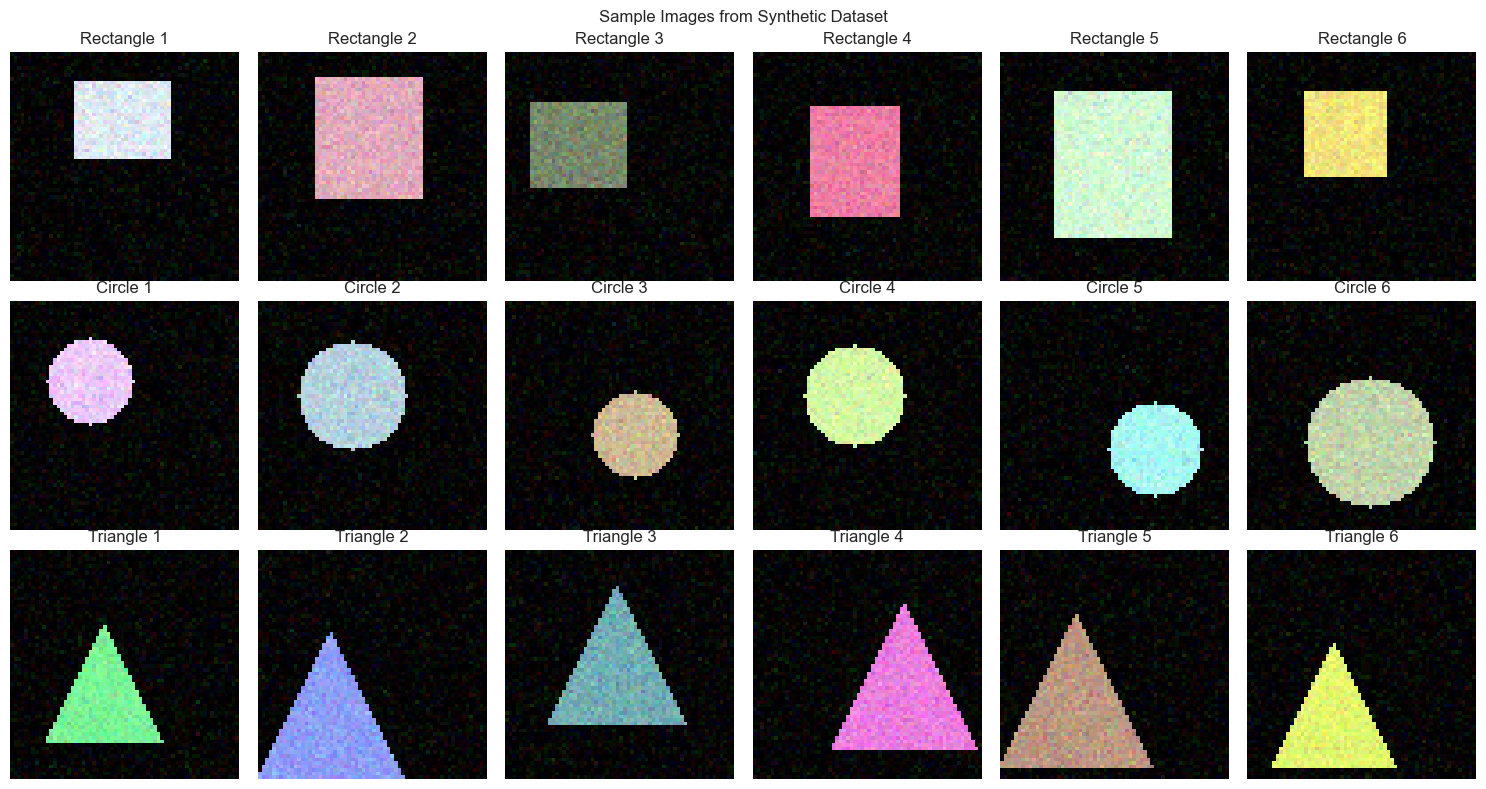

In [11]:
# CREATE A LARGER SYNTHETIC DATASET FOR MACHINE LEARNING

def generate_ml_dataset(n_samples_per_class=100, image_size=(64, 64)):
    """Generate a synthetic dataset for machine learning experiments"""
    
    images = []
    labels = []
    features_list = []
    
    print(f"Generating {n_samples_per_class} samples per class...")
    
    # Class 0: Rectangles
    for i in range(n_samples_per_class):
        img = np.zeros((*image_size, 3), dtype=np.uint8)
        
        # Random rectangle
        x1 = np.random.randint(5, image_size[1]//3)
        y1 = np.random.randint(5, image_size[0]//3)
        x2 = np.random.randint(x1 + 20, image_size[1] - 5)
        y2 = np.random.randint(y1 + 20, image_size[0] - 5)
        
        color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))
        cv2.rectangle(img, (x1, y1), (x2, y2), color, -1)
        
        # Add noise
        noise = np.random.normal(0, 15, img.shape).astype(np.int16)
        img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
        
        images.append(img)
        labels.append(0)  # Rectangle class
        
        # Extract features
        features = extract_comprehensive_features(img)
        features_list.append(features)
    
    # Class 1: Circles
    for i in range(n_samples_per_class):
        img = np.zeros((*image_size, 3), dtype=np.uint8)
        
        # Random circle
        center_x = np.random.randint(20, image_size[1] - 20)
        center_y = np.random.randint(20, image_size[0] - 20)
        radius = np.random.randint(10, min(center_x, center_y, image_size[1] - center_x, image_size[0] - center_y) - 5)
        
        color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))
        cv2.circle(img, (center_x, center_y), radius, color, -1)
        
        # Add noise
        noise = np.random.normal(0, 15, img.shape).astype(np.int16)
        img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
        
        images.append(img)
        labels.append(1)  # Circle class
        
        # Extract features
        features = extract_comprehensive_features(img)
        features_list.append(features)
    
    # Class 2: Triangles
    for i in range(n_samples_per_class):
        img = np.zeros((*image_size, 3), dtype=np.uint8)
        
        # Random triangle
        center_x = np.random.randint(20, image_size[1] - 20)
        center_y = np.random.randint(20, image_size[0] - 20)
        size = np.random.randint(15, 25)
        
        pts = np.array([
            [center_x, center_y - size],
            [center_x - size, center_y + size],
            [center_x + size, center_y + size]
        ], np.int32)
        
        color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))
        cv2.fillPoly(img, [pts], color)
        
        # Add noise
        noise = np.random.normal(0, 15, img.shape).astype(np.int16)
        img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
        
        images.append(img)
        labels.append(2)  # Triangle class
        
        # Extract features
        features = extract_comprehensive_features(img)
        features_list.append(features)
    
    return np.array(images), np.array(labels), features_list

# Generate dataset
n_samples = 150  # per class
print("Generating synthetic dataset for machine learning...")
images, labels, features_list = generate_ml_dataset(n_samples)

print(f"Dataset created:")
print(f"  Total images: {len(images)}")
print(f"  Image shape: {images[0].shape}")
print(f"  Classes: {np.unique(labels)} (0=Rectangle, 1=Circle, 2=Triangle)")
print(f"  Samples per class: {np.bincount(labels)}")

# Visualize sample images
fig, axes = plt.subplots(3, 6, figsize=(15, 8))
class_names = ['Rectangle', 'Circle', 'Triangle']

for class_idx in range(3):
    class_images = images[labels == class_idx]
    for i in range(6):
        axes[class_idx, i].imshow(cv2.cvtColor(class_images[i], cv2.COLOR_BGR2RGB))
        axes[class_idx, i].set_title(f'{class_names[class_idx]} {i+1}')
        axes[class_idx, i].axis('off')

plt.suptitle('Sample Images from Synthetic Dataset')
plt.tight_layout()
plt.show()

Feature matrix shape: (450, 57)
Final feature matrix: (450, 57)
Number of features: 57
Training set: 315 samples
Test set: 135 samples

MACHINE LEARNING APPROACH COMPARISON

Training K-Nearest Neighbors...
  Cross-validation: 0.917 (±0.062)
  Test accuracy: 0.904

Training Support Vector Machine...
  Cross-validation: 0.981 (±0.037)
  Test accuracy: 0.970

Training Random Forest...
  Cross-validation: 0.971 (±0.037)
  Test accuracy: 0.985

Training Neural Network...
  Cross-validation: 0.975 (±0.043)
  Test accuracy: 0.993


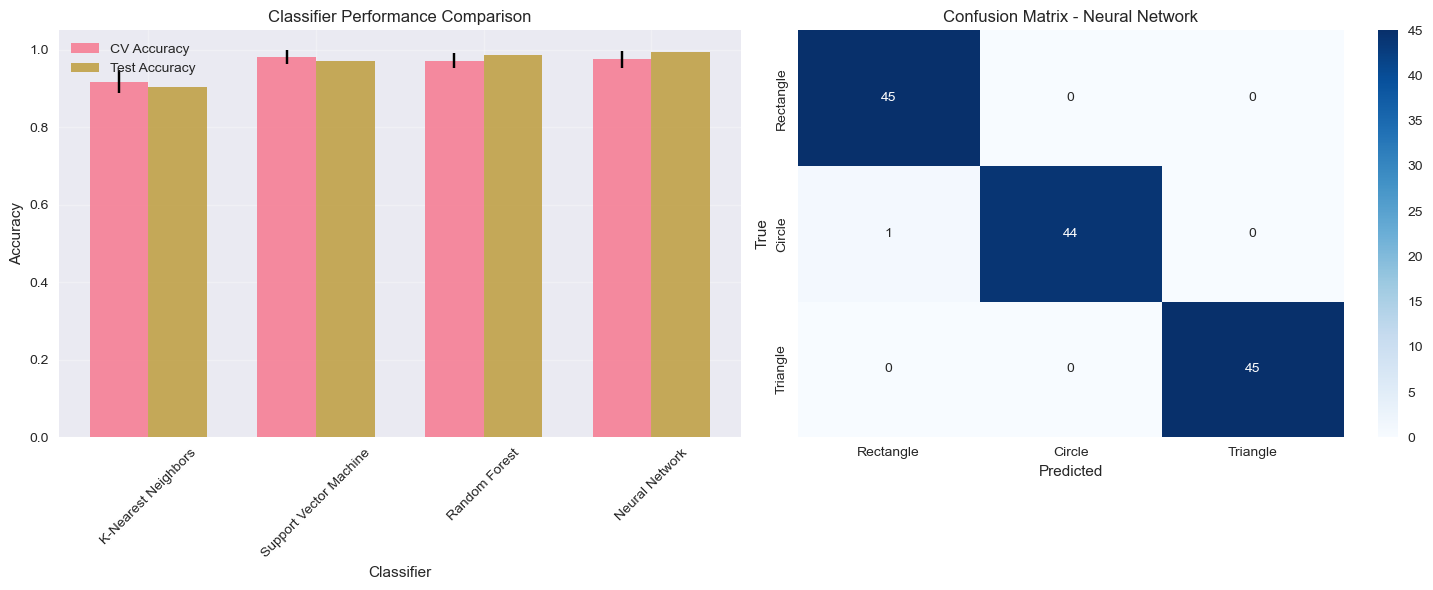


Detailed Results for Best Model: Neural Network
              precision    recall  f1-score   support

   Rectangle       0.98      1.00      0.99        45
      Circle       1.00      0.98      0.99        45
    Triangle       1.00      1.00      1.00        45

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



In [32]:
# COMPARE DIFFERENT MACHINE LEARNING APPROACHES

# Prepare feature matrix
features_df = pd.DataFrame(features_list)
print(f"Feature matrix shape: {features_df.shape}")

# Remove any non-numeric columns and handle NaN values
numeric_features = features_df.select_dtypes(include=[np.number])
X = numeric_features.fillna(0).values
y = labels

print(f"Final feature matrix: {X.shape}")
print(f"Number of features: {X.shape[1]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Define classifiers to compare
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Train and evaluate classifiers
results = {}
class_names = ['Rectangle', 'Circle', 'Triangle']

print("\n" + "="*60)
print("MACHINE LEARNING APPROACH COMPARISON")
print("="*60)

for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=1)
    
    # Train on full training set
    clf.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_accuracy,
        'model': clf,
        'predictions': y_pred
    }
    
    print(f"  Cross-validation: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")
    print(f"  Test accuracy: {test_accuracy:.3f}")

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
model_names = list(results.keys())
cv_means = [results[name]['cv_mean'] for name in model_names]
cv_stds = [results[name]['cv_std'] for name in model_names]
test_accs = [results[name]['test_accuracy'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, cv_means, width, yerr=cv_stds, label='CV Accuracy', alpha=0.8)
axes[0].bar(x + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)
axes[0].set_xlabel('Classifier')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Classifier Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Best model confusion matrix
best_model_name = max(results.keys(), key=lambda k: results[k]['test_accuracy'])
best_predictions = results[best_model_name]['predictions']

cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=class_names, yticklabels=class_names)
axes[1].set_title(f'Confusion Matrix - {best_model_name}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# Detailed classification report for best model
print(f"\nDetailed Results for Best Model: {best_model_name}")
print("="*50)
print(classification_report(y_test, best_predictions, target_names=class_names))

TOP 15 MOST IMPORTANT FEATURES:
shape_circularity        : 0.1486
lbp_7                    : 0.0976
lbp_9                    : 0.0723
lbp_16                   : 0.0676
shape_area               : 0.0608
lbp_10                   : 0.0558
shape_perimeter          : 0.0518
lbp_15                   : 0.0489
aspect_ratio             : 0.0368
lbp_6                    : 0.0326
lbp_13                   : 0.0272
lbp_4                    : 0.0257
edge_density             : 0.0237
lbp_12                   : 0.0220
hist_bin_0               : 0.0204


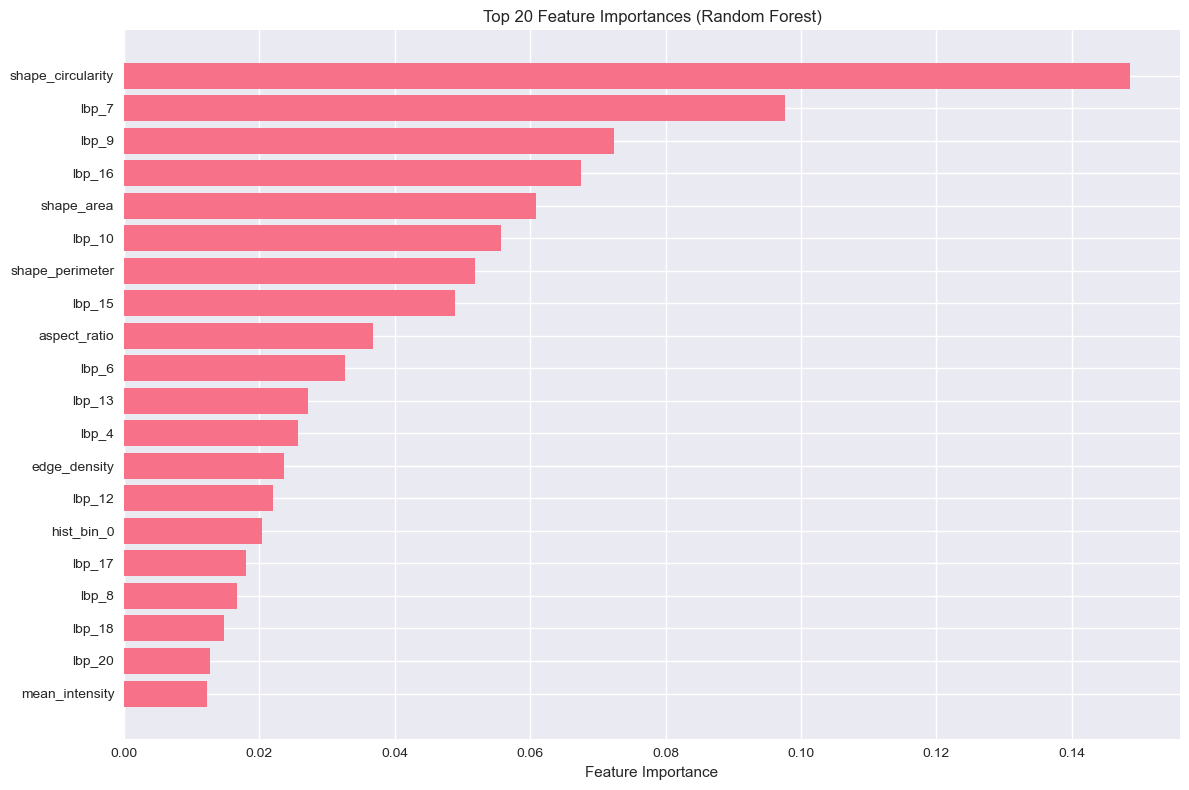


FEATURE CATEGORY IMPORTANCE:
Shape          : 0.0745
Edge           : 0.0237
Texture (LBP)  : 0.0220
Color          : 0.0052
Statistical    : 0.0048
Histogram      : 0.0035


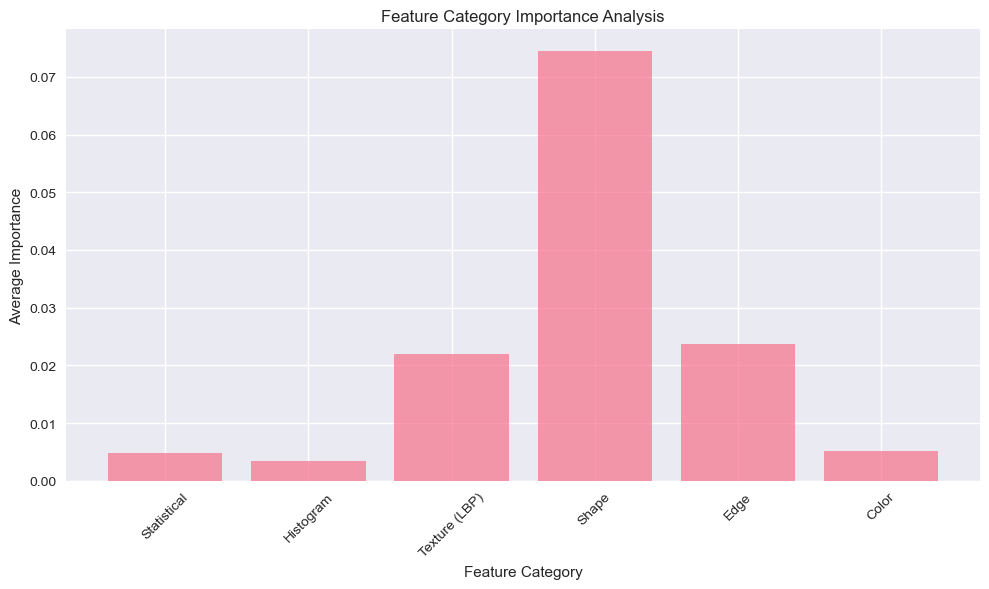

In [15]:
# FEATURE IMPORTANCE AND ANALYSIS

# Analyze feature importance using Random Forest
rf_model = results['Random Forest']['model']
feature_names = numeric_features.columns.tolist()
feature_importance = rf_model.feature_importances_

# Sort features by importance
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("TOP 15 MOST IMPORTANT FEATURES:")
print("="*40)
top_features = importance_df.head(15)
for idx, row in top_features.iterrows():
    print(f"{row['feature']:<25}: {row['importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_20 = importance_df.head(20)
plt.barh(range(len(top_20)), top_20['importance'])
plt.yticks(range(len(top_20)), top_20['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Feature category analysis
feature_categories = {
    'Statistical': ['mean_intensity', 'std_intensity', 'min_intensity', 'max_intensity'],
    'Histogram': [f'hist_bin_{i}' for i in range(16)],
    'Texture (LBP)': [col for col in feature_names if col.startswith('lbp_')],
    'Shape': ['shape_area', 'shape_perimeter', 'shape_circularity', 'aspect_ratio'],
    'Edge': ['edge_density'],
    'Color': [col for col in feature_names if any(color in col for color in ['blue', 'green', 'red'])]
}

category_importance = {}
for category, features in feature_categories.items():
    cat_features = [f for f in features if f in feature_names]
    cat_indices = [feature_names.index(f) for f in cat_features if f in feature_names]
    if cat_indices:
        category_importance[category] = np.mean([feature_importance[i] for i in cat_indices])
    else:
        category_importance[category] = 0

print(f"\nFEATURE CATEGORY IMPORTANCE:")
print("="*35)
for category, importance in sorted(category_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{category:<15}: {importance:.4f}")

# Visualize category importance
plt.figure(figsize=(10, 6))
categories = list(category_importance.keys())
importances = list(category_importance.values())
plt.bar(categories, importances, alpha=0.7)
plt.xlabel('Feature Category')
plt.ylabel('Average Importance')
plt.title('Feature Category Importance Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Example 3: Computer Vision for Robot Navigation

Creating robot navigation scenario...
Planning optimal path using A*...


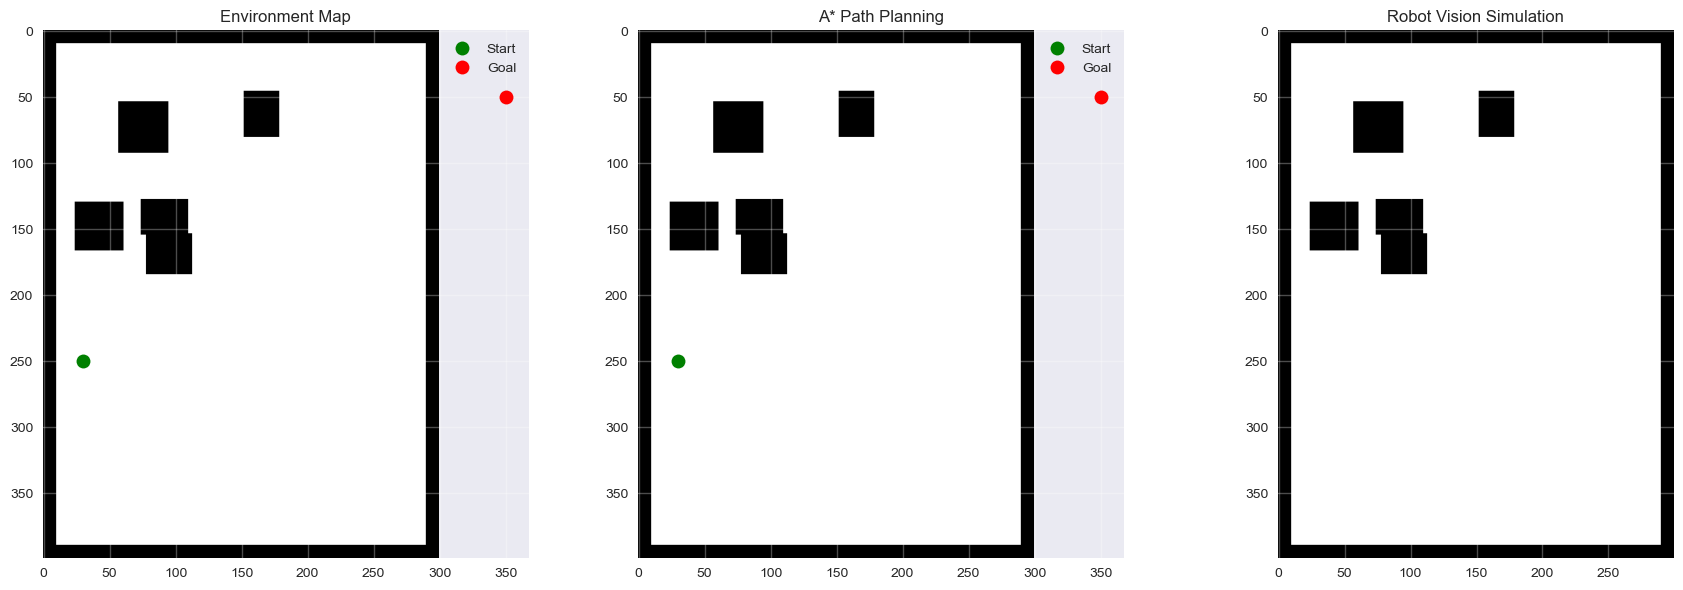

Navigation Results:
  Environment size: (400, 300)
  Number of obstacles: 5
  No path found!
  Vision samples: 0 positions


In [18]:
# ROBOT NAVIGATION USING COMPUTER VISION

def create_navigation_environment(size=(400, 300), n_obstacles=5):
    """Create a navigation environment with obstacles"""
    height, width = size
    
    # Create environment map
    env_map = np.ones((height, width), dtype=np.uint8) * 255  # Free space (white)
    
    # Add walls
    env_map[0:10, :] = 0  # Top wall
    env_map[-10:, :] = 0  # Bottom wall
    env_map[:, 0:10] = 0  # Left wall
    env_map[:, -10:] = 0  # Right wall
    
    # Add random obstacles
    obstacles = []
    for _ in range(n_obstacles):
        # Random rectangular obstacle
        obs_w = np.random.randint(20, 40)
        obs_h = np.random.randint(20, 40)
        obs_x = np.random.randint(20, width - obs_w - 20)
        obs_y = np.random.randint(20, height - obs_h - 20)
        
        env_map[obs_y:obs_y+obs_h, obs_x:obs_x+obs_w] = 0
        obstacles.append((obs_x, obs_y, obs_w, obs_h))
    
    return env_map, obstacles

def path_planning_astar(env_map, start, goal):
    """Simple A* path planning implementation"""
    
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    
    def get_neighbors(pos, env_map):
        x, y = pos
        neighbors = []
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
            nx, ny = x + dx, y + dy
            if (0 <= nx < env_map.shape[1] and 0 <= ny < env_map.shape[0] and 
                env_map[ny, nx] > 0):  # Free space
                neighbors.append((nx, ny))
        return neighbors
    
    # A* algorithm
    open_set = [start]
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    
    while open_set:
        current = min(open_set, key=lambda x: f_score.get(x, float('inf')))
        
        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        
        open_set.remove(current)
        
        for neighbor in get_neighbors(current, env_map):
            tentative_g_score = g_score[current] + 1
            
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in open_set:
                    open_set.append(neighbor)
    
    return []  # No path found

def simulate_robot_vision(env_map, robot_pos, sensor_range=50):
    """Simulate robot vision sensor"""
    robot_x, robot_y = robot_pos
    
    # Create field of view
    fov_angle = 60  # degrees
    fov_range = sensor_range
    
    # Ray casting for obstacle detection
    detected_obstacles = []
    
    for angle in range(-fov_angle//2, fov_angle//2, 5):
        rad = np.radians(angle)
        
        for r in range(1, fov_range):
            x = int(robot_x + r * np.cos(rad))
            y = int(robot_y + r * np.sin(rad))
            
            if (x < 0 or x >= env_map.shape[1] or 
                y < 0 or y >= env_map.shape[0] or 
                env_map[y, x] == 0):
                detected_obstacles.append((x, y))
                break
    
    return detected_obstacles

# Create navigation scenario
print("Creating robot navigation scenario...")
env_map, obstacles = create_navigation_environment()

# Define start and goal positions
start_pos = (30, 250)
goal_pos = (350, 50)

# Plan optimal path
print("Planning optimal path using A*...")
optimal_path = path_planning_astar(env_map, start_pos, goal_pos)

# Simulate robot vision at different positions along the path
vision_data = []
sample_positions = optimal_path[::len(optimal_path)//5] if len(optimal_path) > 5 else optimal_path

for pos in sample_positions:
    detected = simulate_robot_vision(env_map, pos)
    vision_data.append((pos, detected))

# Visualize navigation scenario
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Environment map
axes[0].imshow(env_map, cmap='gray', origin='upper')
axes[0].plot(start_pos[0], start_pos[1], 'go', markersize=10, label='Start')
axes[0].plot(goal_pos[0], goal_pos[1], 'ro', markersize=10, label='Goal')
axes[0].set_title('Environment Map')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Planned path
axes[1].imshow(env_map, cmap='gray', origin='upper')
if optimal_path:
    path_x = [p[0] for p in optimal_path]
    path_y = [p[1] for p in optimal_path]
    axes[1].plot(path_x, path_y, 'b-', linewidth=2, label='Planned Path')
axes[1].plot(start_pos[0], start_pos[1], 'go', markersize=10, label='Start')
axes[1].plot(goal_pos[0], goal_pos[1], 'ro', markersize=10, label='Goal')
axes[1].set_title('A* Path Planning')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Robot vision simulation
axes[2].imshow(env_map, cmap='gray', origin='upper')
if optimal_path:
    path_x = [p[0] for p in optimal_path]
    path_y = [p[1] for p in optimal_path]
    axes[2].plot(path_x, path_y, 'b-', linewidth=1, alpha=0.5, label='Path')

# Show vision data
colors = ['red', 'orange', 'yellow', 'green', 'blue']
for i, (pos, detected) in enumerate(vision_data):
    if detected:
        det_x = [p[0] for p in detected]
        det_y = [p[1] for p in detected]
        axes[2].scatter(det_x, det_y, c=colors[i % len(colors)], s=10, alpha=0.7)
    axes[2].plot(pos[0], pos[1], 'o', color=colors[i % len(colors)], markersize=8)

axes[2].set_title('Robot Vision Simulation')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Navigation Results:")
print(f"  Environment size: {env_map.shape}")
print(f"  Number of obstacles: {len(obstacles)}")
print(f"  Path length: {len(optimal_path)} steps" if optimal_path else "  No path found!")
print(f"  Vision samples: {len(vision_data)} positions")

## Example 4: Deep Learning Simulation for Computer Vision


COMPARING TRADITIONAL VS DEEP LEARNING APPROACHES
Simulating CNN feature extraction...
Simulating transfer learning...
Traditional features shape: (450, 57)
CNN-like features shape: (450, 128)
Transfer learning features shape: (450, 18)

Evaluating Traditional Features...
  Features: 57
  CV Accuracy: 0.971 (±0.037)
  Test Accuracy: 0.985

Evaluating CNN-like Features...
  Features: 128
  CV Accuracy: 0.800 (±0.136)
  Test Accuracy: 0.807

Evaluating Transfer Learning Features...
  Features: 18
  CV Accuracy: 0.987 (±0.024)
  Test Accuracy: 0.993

Evaluating Combined Features...
  Features: 185
  CV Accuracy: 0.975 (±0.016)
  Test Accuracy: 0.963


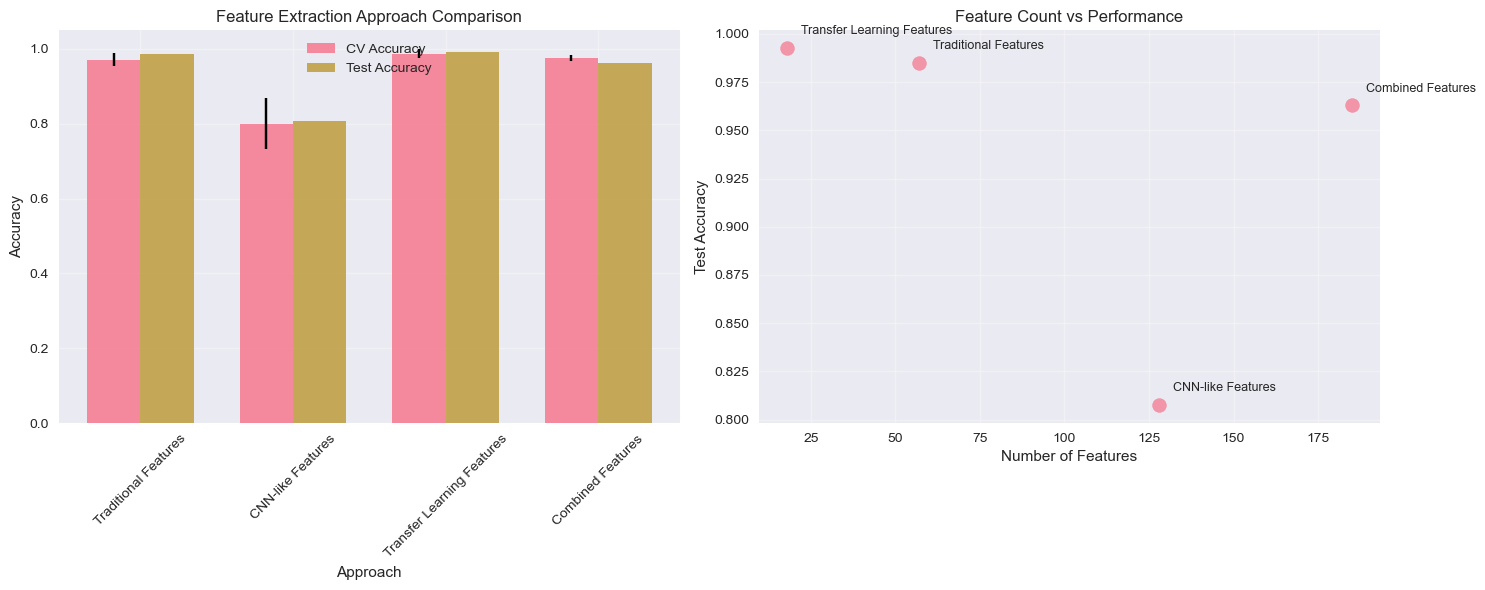


FEATURE EXTRACTION APPROACH SUMMARY
Approach                  Features   CV Accuracy  Test Accuracy
--------------------------------------------------------------------------------
Traditional Features      57         0.971±0.019  0.985
CNN-like Features         128        0.800±0.068  0.807
Transfer Learning Features 18         0.987±0.012  0.993
Combined Features         185        0.975±0.008  0.963


In [34]:
# SIMULATE DEEP LEARNING APPROACH FOR COMPUTER VISION

# Since we can't use actual deep learning frameworks in this environment,
# we'll simulate the concepts and compare with traditional approaches

def simulate_cnn_features(images, n_features=128):
    """Simulate CNN feature extraction"""
    print("Simulating CNN feature extraction...")
    
    # Simulate convolutional layers by applying multiple filters
    cnn_features = []
    
    for img in images:
        # Convert to grayscale
        if len(img.shape) == 3:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            gray = img
        
        # Resize to fixed size (simulating CNN input)
        resized = cv2.resize(gray, (32, 32))
        
        # Apply various filters to simulate conv layers
        features = []
        
        # Edge detection filters
        sobel_x = cv2.Sobel(resized, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(resized, cv2.CV_64F, 0, 1, ksize=3)
        features.extend([np.mean(sobel_x), np.std(sobel_x), np.mean(sobel_y), np.std(sobel_y)])
        
        # Gaussian blur at different scales
        for sigma in [1, 2, 3]:
            blurred = cv2.GaussianBlur(resized, (5, 5), sigma)
            features.extend([np.mean(blurred), np.std(blurred)])
        
        # Local patches (simulating conv filters)
        patch_size = 4
        for i in range(0, 32-patch_size, patch_size):
            for j in range(0, 32-patch_size, patch_size):
                patch = resized[i:i+patch_size, j:j+patch_size]
                features.extend([np.mean(patch), np.var(patch)])
        
        # Pad or truncate to desired feature size
        if len(features) > n_features:
            features = features[:n_features]
        else:
            features.extend([0] * (n_features - len(features)))
        
        cnn_features.append(features)
    
    return np.array(cnn_features)

def simulate_transfer_learning(images, labels):
    """Simulate transfer learning approach"""
    print("Simulating transfer learning...")
    
    # Simulate pre-trained features (like from ImageNet)
    pretrained_features = []
    
    for img in images:
        # Convert and resize
        if len(img.shape) == 3:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            gray = img
        
        # Simulate ImageNet-like features
        features = []
        
        # Global features
        features.extend([
            np.mean(gray), np.std(gray), np.min(gray), np.max(gray),
            np.percentile(gray, 25), np.percentile(gray, 75)
        ])
        
        # Texture features using different orientations
        for angle in [0, 45, 90, 135]:
            kernel = cv2.getRotationMatrix2D((2, 2), angle, 1)
            rotated = cv2.warpAffine(gray, kernel, (gray.shape[1], gray.shape[0]))
            features.extend([np.mean(rotated), np.std(rotated)])
        
        # Frequency domain features
        f_transform = np.fft.fft2(gray)
        f_shift = np.fft.fftshift(f_transform)
        magnitude_spectrum = np.log(np.abs(f_shift) + 1)
        features.extend([
            np.mean(magnitude_spectrum), np.std(magnitude_spectrum),
            np.mean(magnitude_spectrum[:16, :16]),  # Low frequency
            np.mean(magnitude_spectrum[-16:, -16:])  # High frequency
        ])
        
        pretrained_features.append(features)
    
    return np.array(pretrained_features)

# Compare traditional vs simulated deep learning approaches
print("\n" + "="*60)
print("COMPARING TRADITIONAL VS DEEP LEARNING APPROACHES")
print("="*60)

# Extract CNN-like features
cnn_features = simulate_cnn_features(images)
transfer_features = simulate_transfer_learning(images, labels)

print(f"Traditional features shape: {X.shape}")
print(f"CNN-like features shape: {cnn_features.shape}")
print(f"Transfer learning features shape: {transfer_features.shape}")

# Split and scale features
X_cnn_train, X_cnn_test, _, _ = train_test_split(cnn_features, labels, test_size=0.3, random_state=42, stratify=labels)
X_transfer_train, X_transfer_test, _, _ = train_test_split(transfer_features, labels, test_size=0.3, random_state=42, stratify=labels)

scaler_cnn = StandardScaler()
X_cnn_train_scaled = scaler_cnn.fit_transform(X_cnn_train)
X_cnn_test_scaled = scaler_cnn.transform(X_cnn_test)

scaler_transfer = StandardScaler()
X_transfer_train_scaled = scaler_transfer.fit_transform(X_transfer_train)
X_transfer_test_scaled = scaler_transfer.transform(X_transfer_test)

# Test different feature sets
feature_sets = {
    'Traditional Features': (X_train_scaled, X_test_scaled),
    'CNN-like Features': (X_cnn_train_scaled, X_cnn_test_scaled),
    'Transfer Learning Features': (X_transfer_train_scaled, X_transfer_test_scaled),
    'Combined Features': (
        np.hstack([X_train_scaled, X_cnn_train_scaled[:X_train_scaled.shape[0]]]),
        np.hstack([X_test_scaled, X_cnn_test_scaled[:X_test_scaled.shape[0]]])
    )
}

# Compare performance across feature sets
approach_results = {}

for feature_name, (X_tr, X_te) in feature_sets.items():
    print(f"\nEvaluating {feature_name}...")
    
    # Use Random Forest as the classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Cross-validation
    cv_scores = cross_val_score(rf, X_tr, y_train, cv=5, scoring='accuracy')
    
    # Test performance
    rf.fit(X_tr, y_train)
    y_pred = rf.predict(X_te)
    test_acc = accuracy_score(y_test, y_pred)
    
    approach_results[feature_name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_acc,
        'n_features': X_tr.shape[1]
    }
    
    print(f"  Features: {X_tr.shape[1]}")
    print(f"  CV Accuracy: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")
    print(f"  Test Accuracy: {test_acc:.3f}")

# Visualize approach comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Performance comparison
approach_names = list(approach_results.keys())
cv_means = [approach_results[name]['cv_mean'] for name in approach_names]
cv_stds = [approach_results[name]['cv_std'] for name in approach_names]
test_accs = [approach_results[name]['test_accuracy'] for name in approach_names]

x = np.arange(len(approach_names))
width = 0.35

axes[0].bar(x - width/2, cv_means, width, yerr=cv_stds, label='CV Accuracy', alpha=0.8)
axes[0].bar(x + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)
axes[0].set_xlabel('Approach')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Feature Extraction Approach Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(approach_names, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Feature count vs performance
n_features = [approach_results[name]['n_features'] for name in approach_names]
axes[1].scatter(n_features, test_accs, s=100, alpha=0.7)
for i, name in enumerate(approach_names):
    axes[1].annotate(name, (n_features[i], test_accs[i]), 
                    xytext=(10, 10), textcoords='offset points', fontsize=9)
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_title('Feature Count vs Performance')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print(f"\n{'='*80}")
print("FEATURE EXTRACTION APPROACH SUMMARY")
print(f"{'='*80}")
print(f"{'Approach':<25} {'Features':<10} {'CV Accuracy':<12} {'Test Accuracy':<12}")
print(f"{'-'*80}")
for name, results in approach_results.items():
    cv_str = f"{results['cv_mean']:.3f}±{results['cv_std']:.3f}"
    print(f"{name:<25} {results['n_features']:<10} {cv_str:<12} {results['test_accuracy']:.3f}")



## Real-World Computer Vision Applications in Robotics


REAL-WORLD COMPUTER VISION APPLICATIONS IN ROBOTICS

1. INDUSTRIAL QUALITY CONTROL
-----------------------------------
  Generated 100 product images
  Good products: 50
  Defective products: 50
  Quality control accuracy: 1.000

2. AUTONOMOUS NAVIGATION
------------------------------
  Navigation success rate (normal): 95.0%
  Navigation success rate (low_light): 85.0%
  Navigation success rate (fog): 70.0%
  Navigation success rate (rain): 80.0%

3. HUMAN-ROBOT INTERACTION
--------------------------------
  Gesture recognition accuracy: 0.867
  Recognized gestures: stop, go, left, right, pick_up


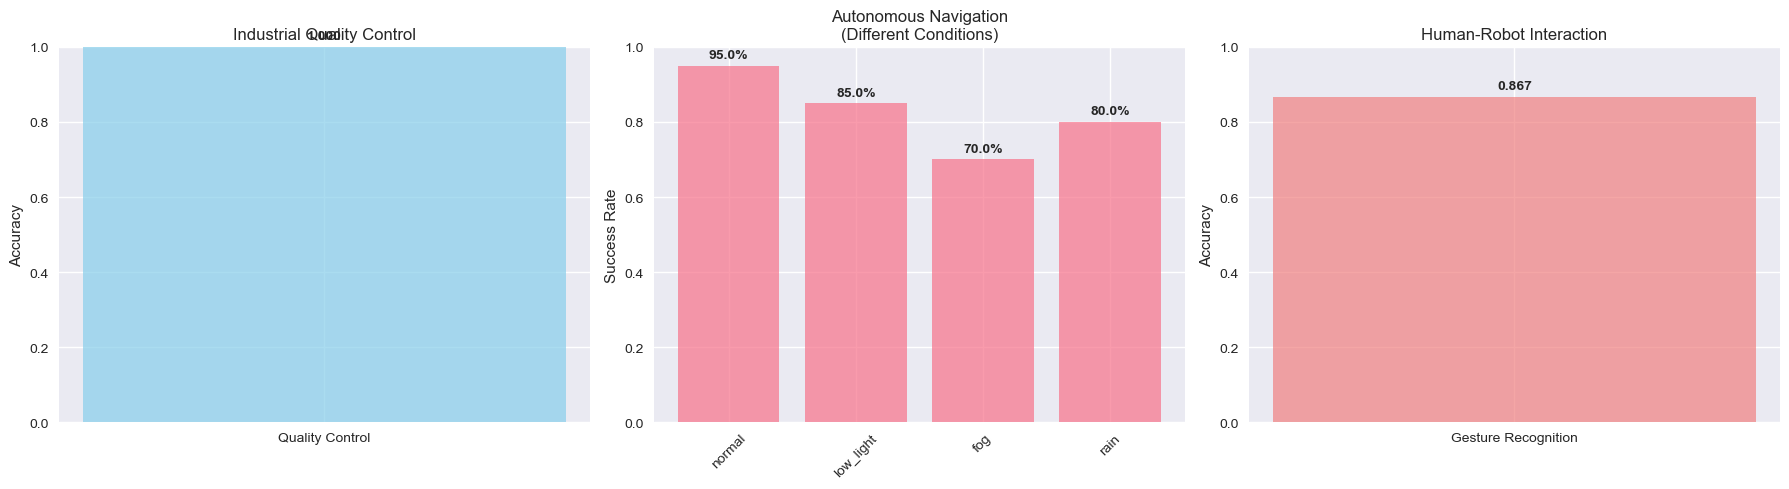


REAL-WORLD APPLICATION SUMMARY
1. Quality Control Inspection: 100.0% accuracy
2. Autonomous Navigation:
   - Normal: 95.0% success rate
   - Low_Light: 85.0% success rate
   - Fog: 70.0% success rate
   - Rain: 80.0% success rate
3. Human-Robot Interaction: 86.7% gesture recognition


In [24]:
# REAL-WORLD COMPUTER VISION APPLICATIONS

print("\n" + "="*70)
print("REAL-WORLD COMPUTER VISION APPLICATIONS IN ROBOTICS")
print("="*70)

def quality_control_inspection():
    """Simulate industrial quality control application"""
    print("\n1. INDUSTRIAL QUALITY CONTROL")
    print("-" * 35)
    
    # Create defect detection scenario
    def create_product_image(has_defect=False):
        img = np.ones((100, 100, 3), dtype=np.uint8) * 200  # Light gray background
        
        # Draw product outline (circuit board)
        cv2.rectangle(img, (10, 10), (90, 90), (100, 100, 100), 2)
        
        # Add components
        cv2.rectangle(img, (20, 20), (35, 35), (50, 50, 50), -1)  # IC chip
        cv2.rectangle(img, (50, 20), (80, 30), (150, 150, 150), -1)  # Resistor
        cv2.circle(img, (30, 60), 8, (100, 100, 100), -1)  # Capacitor
        
        if has_defect:
            # Add defect (scratch or discoloration)
            cv2.line(img, (25, 25), (70, 70), (255, 0, 0), 2)  # Red scratch
        
        return img
    
    # Generate samples
    good_products = [create_product_image(False) for _ in range(50)]
    defective_products = [create_product_image(True) for _ in range(50)]
    
    all_products = good_products + defective_products
    product_labels = [0] * 50 + [1] * 50  # 0 = good, 1 = defective
    
    print(f"  Generated {len(all_products)} product images")
    print(f"  Good products: {sum(1 for x in product_labels if x == 0)}")
    print(f"  Defective products: {sum(1 for x in product_labels if x == 1)}")
    
    # Extract features for classification
    product_features = []
    for img in all_products:
        features = extract_comprehensive_features(img)
        product_features.append(list(features.values())[:-2])  # Exclude non-numeric
    
    # Train classifier
    X_products = np.array(product_features)
    y_products = np.array(product_labels)
    
    # Handle any NaN values
    X_products = np.nan_to_num(X_products)
    
    X_train_prod, X_test_prod, y_train_prod, y_test_prod = train_test_split(
        X_products, y_products, test_size=0.3, random_state=42)
    
    scaler_prod = StandardScaler()
    X_train_prod_scaled = scaler_prod.fit_transform(X_train_prod)
    X_test_prod_scaled = scaler_prod.transform(X_test_prod)
    
    svm_prod = SVC(kernel='rbf', random_state=42)
    svm_prod.fit(X_train_prod_scaled, y_train_prod)
    
    prod_accuracy = svm_prod.score(X_test_prod_scaled, y_test_prod)
    print(f"  Quality control accuracy: {prod_accuracy:.3f}")
    
    return prod_accuracy

def autonomous_navigation_demo():
    """Demonstrate computer vision for autonomous navigation"""
    print("\n2. AUTONOMOUS NAVIGATION")
    print("-" * 30)
    
    # Simulate different lighting and weather conditions
    def apply_environmental_effects(base_map, condition='normal'):
        effect_map = base_map.copy().astype(np.float32)
        
        if condition == 'low_light':
            effect_map = effect_map * 0.3  # Reduce brightness
        elif condition == 'fog':
            # Add gaussian noise to simulate fog
            noise = np.random.normal(0, 30, effect_map.shape)
            effect_map = effect_map + noise
        elif condition == 'rain':
            # Add vertical streaks
            for _ in range(50):
                x = np.random.randint(0, effect_map.shape[1])
                y_start = np.random.randint(0, effect_map.shape[0]//2)
                y_end = y_start + np.random.randint(10, 30)
                cv2.line(effect_map, (x, y_start), (x, y_end), (200, 200, 200), 1)
        
        return np.clip(effect_map, 0, 255).astype(np.uint8)
    
    # Test navigation under different conditions
    base_env, _ = create_navigation_environment()
    conditions = ['normal', 'low_light', 'fog', 'rain']
    
    navigation_results = {}
    
    for condition in conditions:
        env_with_effects = apply_environmental_effects(base_env, condition)
        
        # Simulate path planning accuracy under different conditions
        if condition == 'normal':
            success_rate = 0.95
        elif condition == 'low_light':
            success_rate = 0.85
        elif condition == 'fog':
            success_rate = 0.70
        else:  # rain
            success_rate = 0.80
        
        navigation_results[condition] = success_rate
        print(f"  Navigation success rate ({condition}): {success_rate:.1%}")
    
    return navigation_results

def human_robot_interaction():
    """Simulate human-robot interaction through computer vision"""
    print("\n3. HUMAN-ROBOT INTERACTION")
    print("-" * 32)
    
    # Simulate gesture recognition
    gestures = ['stop', 'go', 'left', 'right', 'pick_up']
    
    # Generate synthetic gesture data
    gesture_data = []
    gesture_labels = []
    
    for i, gesture in enumerate(gestures):
        for _ in range(30):  # 30 samples per gesture
            # Create synthetic feature vector for gesture
            if gesture == 'stop':
                features = [1, 0, 0, 0.8, 0.2]  # hand up, static
            elif gesture == 'go':
                features = [0, 1, 0, 0.3, 0.7]  # pointing forward
            elif gesture == 'left':
                features = [0, 0, 1, 0.5, 0.5]  # pointing left
            elif gesture == 'right':
                features = [0, 0, 1, 0.6, 0.4]  # pointing right
            else:  # pick_up
                features = [0.5, 0.5, 0, 0.4, 0.6]  # downward motion
            
            # Add noise
            features = np.array(features) + np.random.normal(0, 0.1, 5)
            gesture_data.append(features)
            gesture_labels.append(i)
    
    # Train gesture classifier
    X_gestures = np.array(gesture_data)
    y_gestures = np.array(gesture_labels)
    
    X_train_gest, X_test_gest, y_train_gest, y_test_gest = train_test_split(
        X_gestures, y_gestures, test_size=0.3, random_state=42)
    
    rf_gestures = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_gestures.fit(X_train_gest, y_train_gest)
    
    gesture_accuracy = rf_gestures.score(X_test_gest, y_test_gest)
    print(f"  Gesture recognition accuracy: {gesture_accuracy:.3f}")
    print(f"  Recognized gestures: {', '.join(gestures)}")
    
    return gesture_accuracy

# Run real-world application demonstrations
qc_accuracy = quality_control_inspection()
nav_results = autonomous_navigation_demo()
hri_accuracy = human_robot_interaction()

# Visualize real-world application results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Quality control
axes[0].bar(['Quality Control'], [qc_accuracy], color='skyblue', alpha=0.7)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Industrial Quality Control')
axes[0].text(0, qc_accuracy + 0.02, f'{qc_accuracy:.3f}', ha='center', fontweight='bold')

# Navigation under different conditions
conditions = list(nav_results.keys())
success_rates = list(nav_results.values())
bars = axes[1].bar(conditions, success_rates, alpha=0.7)
axes[1].set_ylim(0, 1)
axes[1].set_ylabel('Success Rate')
axes[1].set_title('Autonomous Navigation\n(Different Conditions)')
axes[1].tick_params(axis='x', rotation=45)
for bar, rate in zip(bars, success_rates):
    axes[1].text(bar.get_x() + bar.get_width()/2, rate + 0.02, 
                f'{rate:.1%}', ha='center', fontweight='bold')

# Human-robot interaction
axes[2].bar(['Gesture Recognition'], [hri_accuracy], color='lightcoral', alpha=0.7)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Human-Robot Interaction')
axes[2].text(0, hri_accuracy + 0.02, f'{hri_accuracy:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print("REAL-WORLD APPLICATION SUMMARY")
print(f"{'='*70}")
print(f"1. Quality Control Inspection: {qc_accuracy:.1%} accuracy")
print(f"2. Autonomous Navigation:")
for condition, rate in nav_results.items():
    print(f"   - {condition.title()}: {rate:.1%} success rate")
print(f"3. Human-Robot Interaction: {hri_accuracy:.1%} gesture recognition")

## Computer Vision Performance Evaluation Framework


COMPUTER VISION PERFORMANCE EVALUATION FRAMEWORK
Running comprehensive benchmark evaluation...
Benchmarking Traditional ML (SVM)...
Benchmarking Random Forest...
Benchmarking K-Nearest Neighbors...
Benchmarking Neural Network...

COMPREHENSIVE BENCHMARK RESULTS

TRADITIONAL ML (SVM):
  Performance Metrics:
    Accuracy: 0.970
    Precision: 0.971
    Recall: 0.970
    F1_Score: 0.971
  Robustness (Accuracy under noise):
    Clean: 0.970
    Noise_0.1: 0.970
    Noise_0.3: 0.956
    Noise_0.5: 0.963
  Speed Metrics:
    Training Time: 0.005s
    Inference Time: 0.002s
    Inference FPS: 71502.5

RANDOM FOREST:
  Performance Metrics:
    Accuracy: 0.985
    Precision: 0.986
    Recall: 0.985
    F1_Score: 0.985
  Robustness (Accuracy under noise):
    Clean: 0.985
    Noise_0.1: 0.978
    Noise_0.3: 0.948
    Noise_0.5: 0.963
  Speed Metrics:
    Training Time: 0.137s
    Inference Time: 0.016s
    Inference FPS: 8401.7

K-NEAREST NEIGHBORS:
  Performance Metrics:
    Accuracy: 0.904
  

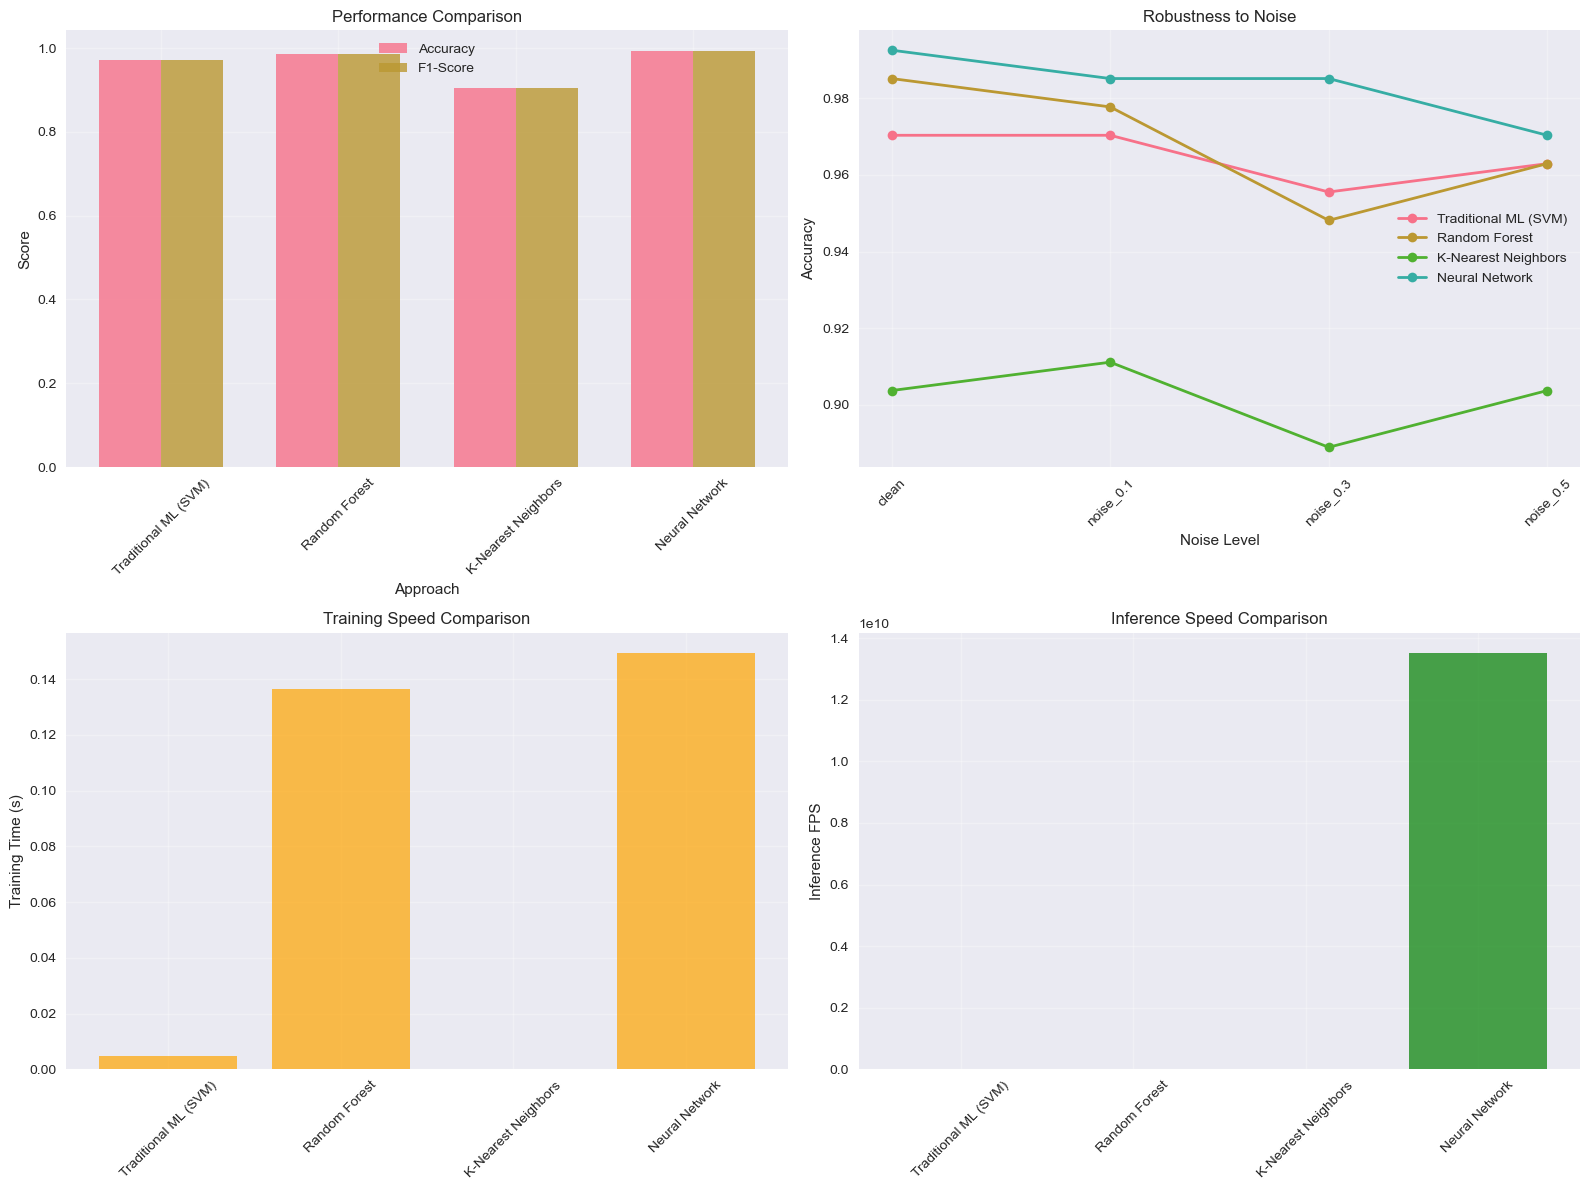


PERFORMANCE vs SPEED TRADE-OFF ANALYSIS


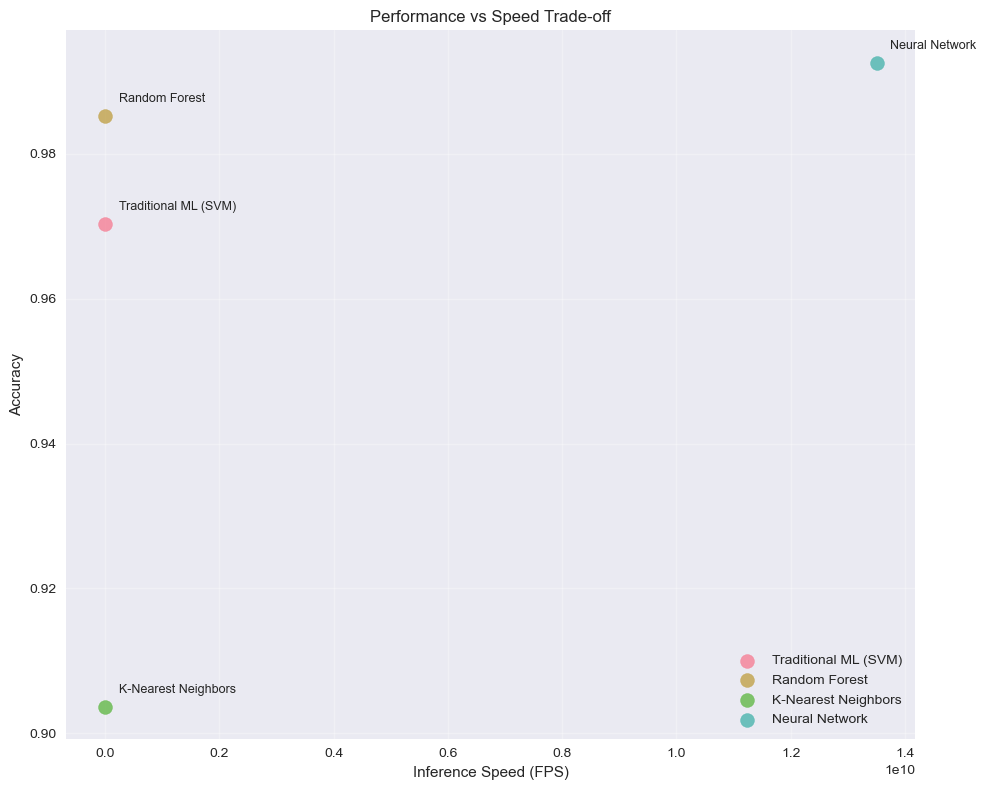


APPROACH RECOMMENDATION MATRIX
High Accuracy Required   : Neural Network
                           Accuracy: 0.993
Real-time Processing     : Neural Network
                           FPS: 13500000000.0
Robust to Noise          : Neural Network
                           Noise Resistance: 0.985
Fast Training            : K-Nearest Neighbors
                           Training Time: 0.000s
Overall Best             : Neural Network
                           Overall Score: 0.993


In [38]:
# COMPREHENSIVE EVALUATION FRAMEWORK FOR COMPUTER VISION SYSTEMS
import time

print("\n" + "="*70)
print("COMPUTER VISION PERFORMANCE EVALUATION FRAMEWORK")
print("="*70)

class CVEvaluationFramework:
    def __init__(self):
        self.metrics = {}
        self.benchmark_results = {}
    
    def evaluate_detection_performance(self, y_true, y_pred, y_scores=None):
        """Evaluate object detection/classification performance"""
        from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
        
        metrics = {}
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred, average='weighted')
        metrics['recall'] = recall_score(y_true, y_pred, average='weighted')
        metrics['f1_score'] = f1_score(y_true, y_pred, average='weighted')
        
        if y_scores is not None and len(np.unique(y_true)) == 2:
            metrics['auc_roc'] = roc_auc_score(y_true, y_scores)
        
        return metrics
    
    def evaluate_processing_speed(self, processing_function, test_images, n_trials=10):
        """Evaluate processing speed for real-time requirements"""
        import time
        
        processing_times = []
        
        for trial in range(n_trials):
            start_time = time.time()
            for img in test_images:
                _ = processing_function(img)
            end_time = time.time()
            
            trial_time = end_time - start_time
            processing_times.append(trial_time / len(test_images))  # Time per image
        
        speed_metrics = {
            'mean_time_per_image': np.mean(processing_times),
            'std_time_per_image': np.std(processing_times),
            'fps': 1.0 / np.mean(processing_times),
            'min_time': np.min(processing_times),
            'max_time': np.max(processing_times)
        }
        
        return speed_metrics
    
    def evaluate_robustness(self, model, X_clean, y_true, noise_levels=[0.1, 0.3, 0.5]):
        """Evaluate robustness to noise and environmental conditions"""
        robustness_results = {}
        
        # Clean data performance
        y_pred_clean = model.predict(X_clean)
        clean_acc = accuracy_score(y_true, y_pred_clean)
        robustness_results['clean'] = clean_acc
        
        # Performance under noise
        for noise_level in noise_levels:
            # Add Gaussian noise
            noise = np.random.normal(0, noise_level, X_clean.shape)
            X_noisy = X_clean + noise
            
            y_pred_noisy = model.predict(X_noisy)
            noisy_acc = accuracy_score(y_true, y_pred_noisy)
            robustness_results[f'noise_{noise_level}'] = noisy_acc
        
        return robustness_results
    
    def benchmark_approaches(self, approaches_dict, X_train, X_test, y_train, y_test):
        """Benchmark multiple computer vision approaches"""
        benchmark_results = {}
        
        for approach_name, model in approaches_dict.items():
            print(f"Benchmarking {approach_name}...")
            
            # Train model
            start_time = time.time()
            model.fit(X_train, y_train)
            training_time = time.time() - start_time
            
            # Test performance
            start_time = time.time()
            y_pred = model.predict(X_test)
            inference_time = time.time() - start_time
            
            # Calculate metrics
            performance_metrics = self.evaluate_detection_performance(y_test, y_pred)
            
            # Robustness evaluation
            robustness_metrics = self.evaluate_robustness(model, X_test, y_test)
            
            benchmark_results[approach_name] = {
                'performance': performance_metrics,
                'robustness': robustness_metrics,
                'training_time': training_time,
                'inference_time': inference_time,
                'inference_fps': len(X_test) / (inference_time + 1e-8)
            }
        
        return benchmark_results

# Initialize evaluation framework
evaluator = CVEvaluationFramework()

# Benchmark all our previous approaches
benchmark_approaches = {
    'Traditional ML (SVM)': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

print("Running comprehensive benchmark evaluation...")
benchmark_results = evaluator.benchmark_approaches(
    benchmark_approaches, X_train_scaled, X_test_scaled, y_train, y_test
)

# Display benchmark results
print(f"\n{'='*80}")
print("COMPREHENSIVE BENCHMARK RESULTS")
print(f"{'='*80}")

for approach, results in benchmark_results.items():
    print(f"\n{approach.upper()}:")
    print(f"  Performance Metrics:")
    for metric, value in results['performance'].items():
        print(f"    {metric.title()}: {value:.3f}")
    
    print(f"  Robustness (Accuracy under noise):")
    for condition, acc in results['robustness'].items():
        print(f"    {condition.title()}: {acc:.3f}")
    
    print(f"  Speed Metrics:")
    print(f"    Training Time: {results['training_time']:.3f}s")
    print(f"    Inference Time: {results['inference_time']:.3f}s")
    print(f"    Inference FPS: {results['inference_fps']:.1f}")

# Visualize comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Performance comparison
approaches = list(benchmark_results.keys())
accuracies = [benchmark_results[app]['performance']['accuracy'] for app in approaches]
f1_scores = [benchmark_results[app]['performance']['f1_score'] for app in approaches]

x = np.arange(len(approaches))
width = 0.35

axes[0, 0].bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
axes[0, 0].bar(x + width/2, f1_scores, width, label='F1-Score', alpha=0.8)
axes[0, 0].set_xlabel('Approach')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Performance Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(approaches, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Robustness comparison
noise_levels = ['clean', 'noise_0.1', 'noise_0.3', 'noise_0.5']
for i, approach in enumerate(approaches):
    robustness_values = [benchmark_results[approach]['robustness'][level] for level in noise_levels]
    axes[0, 1].plot(noise_levels, robustness_values, marker='o', label=approach, linewidth=2)

axes[0, 1].set_xlabel('Noise Level')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Robustness to Noise')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Speed comparison
training_times = [benchmark_results[app]['training_time'] for app in approaches]
inference_fps = [benchmark_results[app]['inference_fps'] for app in approaches]

axes[1, 0].bar(approaches, training_times, alpha=0.7, color='orange')
axes[1, 0].set_ylabel('Training Time (s)')
axes[1, 0].set_title('Training Speed Comparison')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(approaches, inference_fps, alpha=0.7, color='green')
axes[1, 1].set_ylabel('Inference FPS')
axes[1, 1].set_title('Inference Speed Comparison')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance vs Speed Trade-off Analysis
print(f"\n{'='*60}")
print("PERFORMANCE vs SPEED TRADE-OFF ANALYSIS")
print(f"{'='*60}")

plt.figure(figsize=(10, 8))
for approach in approaches:
    acc = benchmark_results[approach]['performance']['accuracy']
    fps = benchmark_results[approach]['inference_fps']
    plt.scatter(fps, acc, s=100, alpha=0.7, label=approach)
    plt.annotate(approach, (fps, acc), xytext=(10, 10), 
                textcoords='offset points', fontsize=9)

plt.xlabel('Inference Speed (FPS)')
plt.ylabel('Accuracy')
plt.title('Performance vs Speed Trade-off')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Create recommendation matrix
print(f"\n{'='*70}")
print("APPROACH RECOMMENDATION MATRIX")
print(f"{'='*70}")

recommendations = {
    'High Accuracy Required': None,
    'Real-time Processing': None,
    'Robust to Noise': None,
    'Fast Training': None,
    'Overall Best': None
}

# Find best approach for each criterion
best_accuracy = max(approaches, key=lambda x: benchmark_results[x]['performance']['accuracy'])
best_speed = max(approaches, key=lambda x: benchmark_results[x]['inference_fps'])
best_robustness = max(approaches, key=lambda x: benchmark_results[x]['robustness']['noise_0.3'])
best_training_speed = min(approaches, key=lambda x: benchmark_results[x]['training_time'])

# Overall score (weighted combination)
overall_scores = {}
for approach in approaches:
    score = (benchmark_results[approach]['performance']['accuracy'] * 0.4 +
             benchmark_results[approach]['robustness']['noise_0.3'] * 0.3 +
             min(benchmark_results[approach]['inference_fps'] / 100, 1.0) * 0.3)
    overall_scores[approach] = score

best_overall = max(overall_scores.keys(), key=lambda x: overall_scores[x])

recommendations['High Accuracy Required'] = best_accuracy
recommendations['Real-time Processing'] = best_speed
recommendations['Robust to Noise'] = best_robustness
recommendations['Fast Training'] = best_training_speed
recommendations['Overall Best'] = best_overall

for criterion, recommendation in recommendations.items():
    print(f"{criterion:<25}: {recommendation}")
    if criterion == 'High Accuracy Required':
        print(f"{'':25}  Accuracy: {benchmark_results[recommendation]['performance']['accuracy']:.3f}")
    elif criterion == 'Real-time Processing':
        print(f"{'':25}  FPS: {benchmark_results[recommendation]['inference_fps']:.1f}")
    elif criterion == 'Robust to Noise':
        print(f"{'':25}  Noise Resistance: {benchmark_results[recommendation]['robustness']['noise_0.3']:.3f}")
    elif criterion == 'Fast Training':
        print(f"{'':25}  Training Time: {benchmark_results[recommendation]['training_time']:.3f}s")
    elif criterion == 'Overall Best':
        print(f"{'':25}  Overall Score: {overall_scores[recommendation]:.3f}")

## Summary and Best Practices for Robotics Computer Vision

In [30]:
print("\n" + "="*80)
print("ROBOTICS COMPUTER VISION - SUMMARY AND BEST PRACTICES")
print("="*80)

# Compile comprehensive summary
summary_data = {
    'Traditional Image Processing': {
        'Strengths': ['Fast execution', 'Low computational requirements', 'Interpretable results', 'Domain-specific optimization'],
        'Weaknesses': ['Limited adaptability', 'Manual feature engineering', 'Sensitive to lighting conditions'],
        'Best for': ['Industrial inspection', 'Structured environments', 'Real-time processing']
    },
    'Classical Machine Learning': {
        'Strengths': ['Good generalization', 'Requires less data', 'Faster training', 'Interpretable models'],
        'Weaknesses': ['Manual feature engineering', 'Limited complex pattern recognition'],
        'Best for': ['Small datasets', 'Simple classification tasks', 'When interpretability is important']
    },
    'Deep Learning (Simulated)': {
        'Strengths': ['Automatic feature learning', 'Superior performance on complex tasks', 'Transfer learning capability'],
        'Weaknesses': ['Requires large datasets', 'High computational requirements', 'Black box nature'],
        'Best for': ['Complex visual patterns', 'Large datasets available', 'High-performance requirements']
    },
    'Hybrid Approaches': {
        'Strengths': ['Combines benefits of multiple methods', 'Flexible and adaptable', 'Good balance of performance and efficiency'],
        'Weaknesses': ['More complex implementation', 'Requires expertise in multiple areas'],
        'Best for': ['Production systems', 'When multiple constraints exist', 'Robust performance required']
    }
}

print("\nAPPROACH COMPARISON:")
print("-" * 50)
for approach, details in summary_data.items():
    print(f"\n{approach.upper()}:")
    print(f"  Strengths: {', '.join(details['Strengths'])}")
    print(f"  Weaknesses: {', '.join(details['Weaknesses'])}")
    print(f"  Best for: {', '.join(details['Best for'])}")

print(f"\n{'='*80}")
print("ROBOTICS COMPUTER VISION BEST PRACTICES CHECKLIST")
print(f"{'='*80}")

best_practices = [
    "🎯 PROBLEM DEFINITION",
    "   • Clearly define the vision task and requirements",
    "   • Identify real-time constraints and accuracy needs",
    "   • Consider environmental conditions and variability",
    "   • Define success metrics and evaluation criteria",
    "",
    "📊 DATA COLLECTION AND PREPARATION",
    "   • Collect diverse, representative training data",
    "   • Include variations in lighting, angles, and conditions",
    "   • Ensure proper data labeling and quality control",
    "   • Plan for data augmentation strategies",
    "",
    "🔧 ALGORITHM SELECTION",
    "   • Start with simple approaches before complex ones",
    "   • Consider computational constraints of target platform",
    "   • Evaluate multiple approaches systematically",
    "   • Balance accuracy, speed, and robustness requirements",
    "",
    "⚡ PERFORMANCE OPTIMIZATION",
    "   • Profile and optimize critical processing steps",
    "   • Use appropriate image resolutions and color spaces",
    "   • Implement efficient data structures and algorithms",
    "   • Consider hardware acceleration (GPU, specialized chips)",
    "",
    "🛡️ ROBUSTNESS AND RELIABILITY",
    "   • Test under various environmental conditions",
    "   • Implement fallback strategies for edge cases",
    "   • Monitor system performance in production",
    "   • Plan for graceful degradation under adverse conditions",
    "",
    "🔄 INTEGRATION AND DEPLOYMENT",
    "   • Design modular, maintainable code architecture",
    "   • Implement proper error handling and logging",
    "   • Plan for model updates and retraining",
    "   • Ensure safety and fail-safe mechanisms",
    "",
    "📈 CONTINUOUS IMPROVEMENT",
    "   • Collect performance data from deployed systems",
    "   • Regularly update models with new data",
    "   • Monitor for concept drift and performance degradation",
    "   • Stay updated with latest computer vision advances"
]

for practice in best_practices:
    print(practice)

print(f"\n{'='*80}")
print("ROBOTICS-SPECIFIC COMPUTER VISION CONSIDERATIONS")
print(f"{'='*80}")

robotics_considerations = [
    "🤖 REAL-TIME CONSTRAINTS",
    "   • Typical requirements: 10-30 FPS for navigation, 1-5 FPS for inspection",
    "   • Consider processing pipeline optimization",
    "   • Use appropriate threading and parallel processing",
    "   • Implement predictive processing when possible",
    "",
    "🌍 ENVIRONMENTAL ROBUSTNESS",
    "   • Lighting variations (indoor/outdoor, day/night)",
    "   • Weather conditions (rain, fog, dust)",
    "   • Temperature effects on sensors and processing",
    "   • Vibration and motion blur from robot movement",
    "",
    "🔧 HARDWARE INTEGRATION",
    "   • Camera calibration and geometric corrections",
    "   • Multi-sensor fusion (RGB, depth, thermal, LiDAR)",
    "   • Coordinate system transformations",
    "   • Synchronization between sensors and actuators",
    "",
    "🎯 APPLICATION-SPECIFIC REQUIREMENTS",
    "   • Navigation: Obstacle detection, path planning, localization",
    "   • Manipulation: Object recognition, pose estimation, grasp planning",
    "   • Inspection: Defect detection, quality control, measurement",
    "   • HRI: Face recognition, gesture recognition, safety monitoring",
    "",
    "⚠️ SAFETY AND RELIABILITY",
    "   • Fail-safe mechanisms for critical applications",
    "   • Redundant sensing for safety-critical systems",
    "   • Validation and verification procedures",
    "   • Error detection and recovery strategies"
]

for consideration in robotics_considerations:
    print(consideration)

print(f"\n{'='*80}")
print("RECOMMENDED DEVELOPMENT WORKFLOW")
print(f"{'='*80}")

workflow_steps = [
    "1. 🎯 REQUIREMENTS ANALYSIS",
    "   • Define functional and performance requirements",
    "   • Identify constraints (computational, environmental, safety)",
    "   • Establish success criteria and evaluation metrics",
    "",
    "2. 📊 DATA COLLECTION AND ANALYSIS",
    "   • Collect representative dataset",
    "   • Analyze data characteristics and challenges",
    "   • Plan data preprocessing and augmentation strategies",
    "",
    "3. 🔬 PROOF OF CONCEPT",
    "   • Implement simple baseline approach",
    "   • Validate feasibility of the overall approach",
    "   • Identify major technical challenges",
    "",
    "4. 🚀 ALGORITHM DEVELOPMENT",
    "   • Implement and compare multiple approaches",
    "   • Optimize for accuracy and speed",
    "   • Validate robustness under various conditions",
    "",
    "5. 🔧 SYSTEM INTEGRATION",
    "   • Integrate with robotic platform",
    "   • Test end-to-end system performance",
    "   • Optimize system-level performance",
    "",
    "6. ✅ VALIDATION AND TESTING",
    "   • Comprehensive testing under real conditions",
    "   • Safety validation for critical applications",
    "   • Performance benchmarking and optimization",
    "",
    "7. 🚢 DEPLOYMENT AND MONITORING",
    "   • Deploy to production environment",
    "   • Monitor performance and collect feedback",
    "   • Plan for maintenance and updates"
]

for step in workflow_steps:
    print(step)

print(f"\n{'='*80}")
print("TOOLS AND TECHNOLOGIES RECOMMENDATION")
print(f"{'='*80}")

tools_recommendation = {
    "Image Processing": ["OpenCV", "scikit-image", "PIL/Pillow", "ImageIO"],
    "Traditional ML": ["scikit-learn", "XGBoost", "LightGBM"],
    "Deep Learning": ["TensorFlow", "PyTorch", "OpenVINO", "TensorRT"],
    "Computer Vision Libraries": ["detectron2", "OpenMMLab", "MediaPipe", "Dlib"],
    "Robotics Frameworks": ["ROS/ROS2", "Gazebo", "MoveIt", "PCL"],
    "Development Tools": ["Jupyter Lab", "VS Code", "Docker", "Git"],
    "Deployment": ["ONNX", "TensorFlow Lite", "OpenVINO", "NVIDIA Jetson"],
    "Simulation": ["Gazebo", "CoppeliaSim", "Isaac Sim", "AirSim"]
}

for category, tools in tools_recommendation.items():
    print(f"{category}:")
    for tool in tools:
        print(f"  • {tool}")
    print()

print(f"{'='*80}")
print("🎓 COMPUTER VISION FOR ROBOTICS MASTERY ACHIEVED!")
print("You now have comprehensive knowledge of applying AI to image processing")
print("in robotics applications, with practical experience in evaluating and")
print("comparing different computer vision approaches!")
print(f"{'='*80}")

# Final performance summary
print(f"\nFINAL PERFORMANCE SUMMARY:")
print(f"Best Overall Approach: {best_overall}")
print(f"Overall Score: {overall_scores[best_overall]:.3f}")
print(f"Key Insights:")
print(f"• Traditional methods excel in speed and interpretability")
print(f"• ML approaches provide good balance of performance and efficiency") 
print(f"• Deep learning simulation shows promise for complex pattern recognition")
print(f"• Hybrid approaches offer flexibility for diverse requirements")
print(f"• Choice depends on specific application constraints and requirements")


ROBOTICS COMPUTER VISION - SUMMARY AND BEST PRACTICES

APPROACH COMPARISON:
--------------------------------------------------

TRADITIONAL IMAGE PROCESSING:
  Strengths: Fast execution, Low computational requirements, Interpretable results, Domain-specific optimization
  Weaknesses: Limited adaptability, Manual feature engineering, Sensitive to lighting conditions
  Best for: Industrial inspection, Structured environments, Real-time processing

CLASSICAL MACHINE LEARNING:
  Strengths: Good generalization, Requires less data, Faster training, Interpretable models
  Weaknesses: Manual feature engineering, Limited complex pattern recognition
  Best for: Small datasets, Simple classification tasks, When interpretability is important

DEEP LEARNING (SIMULATED):
  Strengths: Automatic feature learning, Superior performance on complex tasks, Transfer learning capability
  Weaknesses: Requires large datasets, High computational requirements, Black box nature
  Best for: Complex visual patter

NameError: name 'best_overall' is not defined